# 분석 환경 설정

In [1]:
#한글화 폰트
!pip install --target=$my_path koreanize_matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.8 MB/s eta 0:00:00


In [2]:
# 필요한 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import re
import statsmodels.api as sm
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

## 데이터 전처리

### 공공자전거 대여소 월별 데이터 전처리

**데이터 설명 : 2023년도 서울특별시 공공자전거 대여소별 대여 정보를 월별로 보여주는 데이터이다.**

**변수명 설명**
* 자치구 : 서울특별시 25개의 자치구 이름
* 대여소명 : 서울특별시에 존재하는 공공자전거 대여소 이름 (예: 코드번호. 대여소 이름)
* 기준년월 : 연월 표시 (예: 202301)
* 대여건수 : 자치구, 대여소명, 기준년월을 기준으로 월간 대여한 건수
* 반납건수 : 자치구, 대여소명, 기준년월을 기준으로 월간 반납한 건수

In [4]:
#공공자전거 대여소 월별 데이터(23년)
monthly_rent_spot_23h1_df = pd.read_csv("/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.csv",encoding ='cp949')
monthly_rent_spot_23h2_df = pd.read_csv("/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여소별 이용정보(월별)_23.7-12.csv",encoding ='cp949')

In [5]:
# 23년도 상반기 하반기 데이터 결합
monthly_rent_spot_23_df = pd.concat([monthly_rent_spot_23h1_df,monthly_rent_spot_23h2_df])
monthly_rent_spot_23_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202301,383,439
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202301,433,446
2,강남구,2303. 논현역 10번출구,202301,648,508
3,강남구,2304. 대현그린타워,202301,76,55
4,강남구,2305. MCM 본사 직영점 앞,202301,172,179
...,...,...,...,...,...
16376,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202312,951,996
16377,양천구,723. SBS방송국,202312,1707,1679
16378,양천구,724. 계남공원 입구 주출입구 좌측,202312,138,94
16379,양천구,725. 양강중학교앞 교차로,202312,299,138


In [6]:
monthly_rent_spot_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32687 entries, 0 to 16380
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     32687 non-null  object
 1   대여소명    32687 non-null  object
 2   기준년월    32687 non-null  int64 
 3   대여건수    32687 non-null  object
 4   반납건수    32687 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
#기초통계량
monthly_rent_spot_23_df.describe(include='all')

,자치구,대여소명,기준년월,대여건수,반납건수
count,32687,32687,32687.000000,32687,32687
unique,25,2833,NaN,8339,8416
top,송파구,2301. 현대고등학교 건너편,NaN,175,374
freq,2587,12,NaN,21,21
mean,NaN,NaN,202306.507725,NaN,NaN
std,NaN,NaN,3.450633,NaN,NaN
min,NaN,NaN,202301.000000,NaN,NaN
25%,NaN,NaN,202304.000000,NaN,NaN
50%,NaN,NaN,202307.000000,NaN,NaN
75%,NaN,NaN,202310.000000,NaN,NaN


In [8]:
# 결측치 확인
print(monthly_rent_spot_23_df.isna().sum())

자치구     0
대여소명    0
기준년월    0
대여건수    0
반납건수    0
dtype: int64


In [9]:
# 중복값 확인
print(monthly_rent_spot_23_df.duplicated().sum())

0


In [10]:
# 대여건수에서 숫자로 변환할 수 없는 값 추출
invalid_rent_values = monthly_rent_spot_23_df[pd.to_numeric(monthly_rent_spot_23_df['대여건수'], errors='coerce').isna()]['대여건수']

# 반납건수에서 숫자로 변환할 수 없는 값 추출
invalid_return_values = monthly_rent_spot_23_df[pd.to_numeric(monthly_rent_spot_23_df['반납건수'], errors='coerce').isna()]['반납건수']

# 결과 확인
print("대여건수에서 숫자로 변환되지 않은 값:")
print(invalid_rent_values)

print("반납건수에서 숫자로 변환되지 않은 값:")
print(invalid_return_values)

대여건수에서 숫자로 변환되지 않은 값:
65        1,242 
170       1,451 
171       2,207 
172       1,377 
173       1,543 
          ...   
15997     1,278 
16012     1,144 
16013     1,675 
16014     1,942 
16015     2,166 
Name: 대여건수, Length: 7470, dtype: object
반납건수에서 숫자로 변환되지 않은 값:
36        1,034 
65        1,275 
170       1,674 
171       2,201 
172       1,370 
          ...   
15997     1,259 
16012     1,201 
16013     1,664 
16014     2,071 
16015     2,719 
Name: 반납건수, Length: 7311, dtype: object


In [11]:
# 대여건수와 반납건수를 먼저 문자열로 변환한 후 쉼표 제거
monthly_rent_spot_23_df['대여건수'] = monthly_rent_spot_23_df['대여건수'].astype(str).str.replace(',', '')
monthly_rent_spot_23_df['반납건수'] = monthly_rent_spot_23_df['반납건수'].astype(str).str.replace(',', '')

In [12]:
monthly_rent_spot_23_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202301,383,439
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202301,433,446
2,강남구,2303. 논현역 10번출구,202301,648,508
3,강남구,2304. 대현그린타워,202301,76,55
4,강남구,2305. MCM 본사 직영점 앞,202301,172,179
...,...,...,...,...,...
16376,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202312,951,996
16377,양천구,723. SBS방송국,202312,1707,1679
16378,양천구,724. 계남공원 입구 주출입구 좌측,202312,138,94
16379,양천구,725. 양강중학교앞 교차로,202312,299,138


In [13]:
# 대여건수에서 숫자로 변환할 수 없는 값 추출
invalid_rent_values = monthly_rent_spot_23_df[pd.to_numeric(monthly_rent_spot_23_df['대여건수'], errors='coerce').isna()]['대여건수']

# 반납건수에서 숫자로 변환할 수 없는 값 추출
invalid_return_values = monthly_rent_spot_23_df[pd.to_numeric(monthly_rent_spot_23_df['반납건수'], errors='coerce').isna()]['반납건수']

# 결과 확인
print("대여건수에서 숫자로 변환되지 않은 값:")
print(invalid_rent_values)

print("반납건수에서 숫자로 변환되지 않은 값:")
print(invalid_return_values)

대여건수에서 숫자로 변환되지 않은 값:
Series([], Name: 대여건수, dtype: object)
반납건수에서 숫자로 변환되지 않은 값:
495       - 
7112      - 
15179     - 
Name: 반납건수, dtype: object


In [14]:
# 대여건수와 반납건수를 먼저 문자열로 변환한 후 쉼표 제거
monthly_rent_spot_23_df['대여건수'] = monthly_rent_spot_23_df['대여건수'].astype(str).str.replace(' - ', '0')
monthly_rent_spot_23_df['반납건수'] = monthly_rent_spot_23_df['반납건수'].astype(str).str.replace(' - ', '0')

In [15]:
# int유형으로 바꾸기
monthly_rent_spot_23_df['반납건수'] = monthly_rent_spot_23_df['반납건수'].astype(int)
monthly_rent_spot_23_df['대여건수'] = monthly_rent_spot_23_df['대여건수'].astype(int)

In [16]:
monthly_rent_spot_23_df.describe()

,기준년월,대여건수,반납건수
count,32687.000000,32687.000000,32687.000000
mean,202306.507725,1371.982898,1361.034479
std,3.450633,1354.334767,1406.061690
min,202301.000000,1.000000,0.000000
25%,202304.000000,485.000000,432.000000
50%,202307.000000,977.000000,955.000000
75%,202310.000000,1801.000000,1812.000000
max,202312.000000,21106.000000,21201.000000


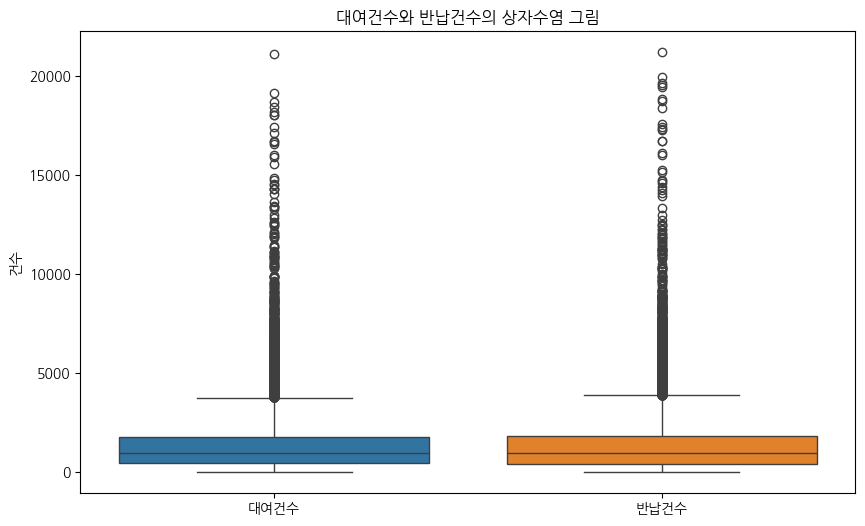

In [17]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 두 열의 상자수염 그림 그리기
sns.boxplot(data=monthly_rent_spot_23_df[['대여건수', '반납건수']])

# 제목과 라벨 설정
plt.title('대여건수와 반납건수의 상자수염 그림')
plt.ylabel('건수')

# 그래프 보여주기
plt.show()

상자수염그림 확인시 iqr*1.5 기준으로 이상치를 확인 할 수 있다.

하지만 이상치가 떨어져있지 않고 연속적으로 이어져있기에 이상치로 판단하기 어렵다. --> 원본데이터 유지



In [18]:
# 가공한 데이터프레임 csv로 추출
# monthly_rent_spot_23_df.to_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/대여소 23년 데이터.csv')

### 서울시 공공자전거 대여이력 정보 시간대별 데이터 전처리

**데이터 설명 : 2023년도 서울특별시 공공자전거 시간대별 대여이력 정보입니다.**

**사용한 변수명**
1. 대여일시 : 공공자전거 대여 시간(예 : 2023.1.1 0:02)
2. 대여 대여소명 : 대여한 대여소의 이름
3. 반납일시 : 공공자전거 반납 시간 (예 : 2023.1.1 0:31)
4. 반납 대여소명 : 반납한 대여소의 이름
5. 이용시간(분) : 대여 대여소에서 반납 대여소까지 공공자전거를 이용한 시간(분)
6. 이용거리(M) : 대여 대여소에서 반납 대여소까지 공공자전거를 이용한 거리(M)
7. 생년 : 태어난 해 (예 : 1988)
8. 대여대여소ID : 공공자전거를 대여한 대여소의 ID
9. 반납대여소ID : 공공자전거를 반납한 대여소의 ID

**사용하지 않은 변수명**
1. 자전거번호 : 공공자전거의 고유 번호
2. 대여 대여소 번호 : 대여한 대여소의 고유 번호
3. 대여 거치대 : 0과 99로 표시 (0 : QR 거치대, 99 : 새싹 거치대)
4. 반납 대여소 번호 : 반납한 대여소의 고유 번호
5. 반납 거치대 : 0과 99로 표시 (예 : 0-QR 거치대, 99-새싹 거치대)
6. 이용자종류 : 내국인과 외국인, 비회원으로 구분

In [19]:
#서울시 공공자전거 대여이력 정보 시간대별 데이터 전처리

'''
원본 데이터 크기가 커서 코렙으로 코드를 실행하기에 제한
따라서 원본데이터를 vscode에서 표본추출하여 코렙에서 진행
하지만 분석결과와 결론은 전체 데이터셋을 기반으로 진행한 분석결과를 따름

표본추출방법

월별로 기록된 원본데이터마다 시간대별로 10%씩 추출
'''

bike_rent_history_2301_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2301(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2302_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2302(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2303_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2303(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2304_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2304(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2305_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2305(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2306_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2306(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2307_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2307(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2308_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2308(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2309_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2309(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2310_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2310(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2311_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2311(표본추출).csv', encoding = 'utf-8')
bike_rent_history_2312_df = pd.read_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/서울특별시 공공자전거 대여이력 정보_2312(표본추출).csv', encoding = 'utf-8')

In [20]:
# 23년도 공공자전거 대여이력 결합
bike_rent_return_23_df = pd.concat([bike_rent_history_2301_df, bike_rent_history_2302_df, bike_rent_history_2303_df, bike_rent_history_2304_df, bike_rent_history_2305_df, bike_rent_history_2306_df, bike_rent_history_2307_df, bike_rent_history_2308_df, bike_rent_history_2309_df, bike_rent_history_2310_df, bike_rent_history_2311_df, bike_rent_history_2312_df], axis=0)

In [21]:
bike_rent_return_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4638816 entries, 0 to 217620
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일시     object 
 1   대여 대여소명  object 
 2   반납일시     object 
 3   반납대여소명   object 
 4   이용시간(분)  int64  
 5   이용거리(M)  float64
 6   생년       object 
 7   대여대여소ID  object 
 8   반납대여소ID  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 353.9+ MB


In [22]:
# 결측값 확인
bike_rent_return_23_df.isna().sum()

,0
대여일시,0
대여 대여소명,0
반납일시,0
반납대여소명,0
이용시간(분),0
이용거리(M),0
생년,1
대여대여소ID,0
반납대여소ID,0


In [23]:
# 결측값 제거
bike_rent_return_23_df = bike_rent_return_23_df.dropna(subset=['생년'])

In [24]:
# 기초통계량
bike_rent_return_23_df.describe(include = 'all')

,대여일시,대여 대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),생년,대여대여소ID,반납대여소ID
count,4638815,4638815,4638815,4638815,4.638815e+06,4.638815e+06,4638815,4638815,4638815
unique,4106818,2831,4110048,2843,NaN,NaN,177,2788,2796
top,2023-09-11 18:14:26,마곡나루역 2번 출구,2023-09-07 09:00:12,\N,NaN,NaN,\N,ST-2031,\N
freq,8,18555,269,19119,NaN,NaN,345974,18555,19119
mean,NaN,NaN,NaN,NaN,2.044522e+01,2.340350e+03,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.831167e+01,2.963707e+03,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000000e+00,7.992900e+02,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.100000e+01,1.410000e+03,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.400000e+01,2.640000e+03,NaN,NaN,NaN


In [25]:
# 비회원이나 회원인데 생년을 입력하지 않은 경우 생년이 '\n'으로 기록됨 --> 총 이용건수를 알아내기 위해서 삭제하지 않음.

# 반납대여소명이나 반납대여소ID가 '\N'값으로 저장되어 있는 값 행은 대여에서 반납이 불분명하여 제외
bike_rent_return_23_df = bike_rent_return_23_df[(bike_rent_return_23_df['반납대여소명'] != '\\N') & (bike_rent_return_23_df['반납대여소ID'] != '\\N')]

In [26]:
# 이용시간, 이용거리가 0이면 이동하지 않고 바로 반납한 것으로 판단 --> 해당 행 제외
bike_rent_return_23_df = bike_rent_return_23_df[(bike_rent_return_23_df['이용시간(분)'] != 0) & (bike_rent_return_23_df['이용거리(M)'] != 0.0)]

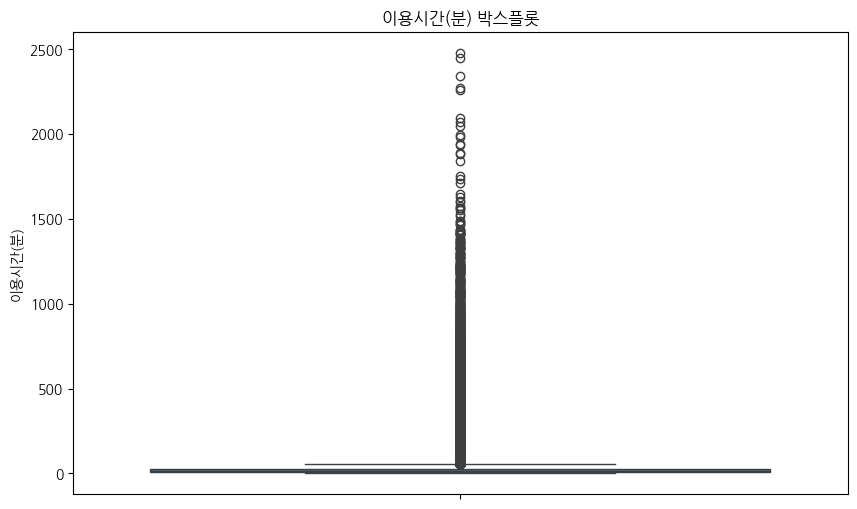

In [27]:
# 이상치 확인
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(y=bike_rent_return_23_df['이용시간(분)'])

# 제목 및 레이블 추가
plt.title('이용시간(분) 박스플롯')
plt.ylabel('이용시간(분)')

# 그래프 표시
plt.show()

In [28]:
# 이상치 제거
# 1일 기준 1440분이기 때문에 1일을 초과해서 이용하는 건 이상치로 판단 (24시간 * 60분 = 1440분)
bike_rent_return_23_df = bike_rent_return_23_df[bike_rent_return_23_df['이용시간(분)'] <= 1440]

In [29]:
bike_rent_return_23_df['이용거리(M)'].describe()

,이용거리(M)
count,4.396229e+06
mean,2.460846e+03
std,2.984503e+03
min,1.000000e-01
25%,8.719500e+02
50%,1.489150e+03
75%,2.750000e+03
max,2.425911e+05


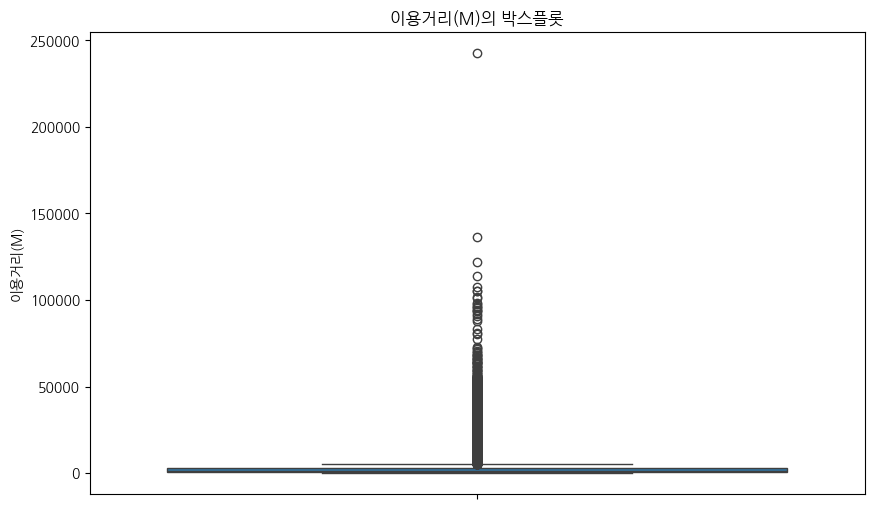

In [30]:
# 이상치 확인
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(y=bike_rent_return_23_df['이용거리(M)'])

# 제목 및 레이블 추가
plt.title('이용거리(M)의 박스플롯')
plt.ylabel('이용거리(M)')

# 그래프 표시
plt.show()

In [31]:
# 이상치 제거
# 생활용 자전거 속도 시속 15 ~ 20km/h --> 하루 이동거리 = 20km/h * 24 = 480000m
# 1일 기준 이동거리 480000m이기 때문에 1일를 초과해서 먼거리를 이동하는 건 이상치로 판단
bike_rent_return_23_df = bike_rent_return_23_df[bike_rent_return_23_df['이용거리(M)'] <= 480000]

In [32]:
bike_rent_return_23_df['대여대여소ID'].nunique()

2787

In [33]:
bike_rent_return_23_df['대여 대여소명'].nunique()

2830

In [34]:
# '대여대여소ID'가 2가지 이상의 이름을 가지는 값이 있는지 알아보기
# '대여대여소ID'별로 그룹화하고, '대여 대여소명'의 고유 개수가 1보다 큰 그룹을 필터링
result_df = bike_rent_return_23_df[['대여대여소ID','대여 대여소명']].groupby('대여대여소ID').filter(lambda x: x['대여 대여소명'].nunique() > 1)

# 결과 확인
print(result_df)

        대여대여소ID          대여 대여소명
12       ST-275          서울시립대 앞
61       ST-391       서울시립대 정문 앞
94       ST-507  개화동상사마을종점 버스정류장
116     ST-2642        독산역1번출구 옆
131     ST-2719     은행사거리 성모빌딩 앞
...         ...              ...
217492   ST-159   힐스테이트창경궁 아파트 앞
217501   ST-914         상계역 3번출구
217523   ST-389       전농초등학교 건너편
217529  ST-1903      서초동 현대아파트 앞
217608  ST-1817     성균관대입구 사거리 B

[72404 rows x 2 columns]


In [35]:
print(bike_rent_return_23_df[['대여대여소ID', '대여 대여소명']][bike_rent_return_23_df['대여대여소ID'] == 'ST-2642'].head(1))
print(bike_rent_return_23_df[['대여대여소ID', '대여 대여소명']][bike_rent_return_23_df['대여대여소ID'] == 'ST-2642'].tail(1))

     대여대여소ID    대여 대여소명
116  ST-2642  독산역1번출구 옆
        대여대여소ID    대여 대여소명
215223  ST-2642  독산역1번출구 B


In [36]:
n_bike_rent_return_23_df = bike_rent_return_23_df[['대여대여소ID', '대여 대여소명']]

In [37]:
# 대여대여소ID를 기준으로 그룹화하고, 각 ID별로 유일한 대여 대여소명 추출
grouped = n_bike_rent_return_23_df.groupby('대여대여소ID')['대여 대여소명'].unique()

# 결과 확인
rent_result = grouped.reset_index()
rent_result.columns = ['대여대여소ID', '다른 대여 대여소명']

In [38]:
rent_result

,대여대여소ID,다른 대여 대여소명
0,ST-10,[서교동 사거리]
1,ST-1000,[서부식자재마트 건너편]
2,ST-1002,[서울시 도로환경관리센터]
3,ST-1003,[신월중학교]
4,ST-1004,[신정이펜하우스314동]
...,...,...
2782,ST-993,[경서농협 버스정류장(우리은행신정동지점방향)]
2783,ST-994,[SBS방송국]
2784,ST-995,[계남공원 입구 주출입구 좌측]
2785,ST-996,[양강중학교앞 교차로]


In [39]:
# 딕셔너리 생성: 대여대여소ID를 키로 하고, 리스트의 마지막 값을 값으로 설정
rent_mapping_dict = rent_result.set_index('대여대여소ID')['다른 대여 대여소명'].apply(lambda x: x[-1]).to_dict()

print(rent_mapping_dict)

{'ST-10': '서교동 사거리', 'ST-1000': '서부식자재마트 건너편', 'ST-1002': '서울시 도로환경관리센터', 'ST-1003': '신월중학교', 'ST-1004': '신정이펜하우스314동', 'ST-1005': '신트리공원 입구', 'ST-1006': '영도초등학교', 'ST-1007': '오솔길공원', 'ST-1008': '장수공원', 'ST-1010': '신월사거리', 'ST-1011': '으뜸공원', 'ST-1012': '화곡로 입구 교차로', 'ST-1013': '등촌역 5번 출구 뒤', 'ST-1014': '현대6차아파트 101동 옆', 'ST-1015': '신목동역 2번 출구', 'ST-1016': '강서초등학교', 'ST-1017': '목동2단지 상가', 'ST-1018': '목동3단지 상가', 'ST-1019': '목동운동장', 'ST-102': '자양사거리 광진아크로텔 앞', 'ST-1020': '신사동 성당', 'ST-1023': '상림마을 롯데캐슬2단지 옆', 'ST-1024': '금암 문화공원', 'ST-1025': '은평구청 교차로', 'ST-1027': '은평뉴타운 도서관', 'ST-1028': '상림마을 생태공원', 'ST-1029': '은평구청 보건소', 'ST-103': '금호 어울림 아파트 앞', 'ST-1031': '기자촌 사거리 A', 'ST-1032': '독바위역', 'ST-1033': '연신내 선일하이츠빌 정류소', 'ST-1034': '디지털미디어 시티역 4번출구(DMC역)', 'ST-1035': '연신내역 1번 출구', 'ST-1036': '구산역 2번 출구 예일여고 버스정류장', 'ST-1038': '서울연신중학교', 'ST-1039': '서울연신초등학교', 'ST-1040': '한국종합기술사옥 앞', 'ST-1041': '강동구청 앞', 'ST-1042': '상일초등학교', 'ST-1043': '대명초교 입구 교차로', 'ST-1044': '프라자 아파트 앞', 'ST-1045': '포레스 

In [40]:
n2_bike_rent_return_23_df = bike_rent_return_23_df[['반납대여소ID', '반납대여소명']]

In [41]:
# 대여대여소ID를 기준으로 그룹화하고, 각 ID별로 유일한 대여 대여소명 추출
grouped = n2_bike_rent_return_23_df.groupby('반납대여소ID')['반납대여소명'].unique()

# 결과
return_result = grouped.reset_index()
return_result.columns = ['반납대여소ID', '다른 반납 대여소명']

In [42]:
# 딕셔너리 생성: 대여대여소ID를 키로 하고, 리스트의 마지막 값을 값으로 설정
return_mapping_dict = return_result.set_index('반납대여소ID')['다른 반납 대여소명'].apply(lambda x: x[-1]).to_dict()

print(return_mapping_dict)

{'ST-10': '서교동 사거리', 'ST-1000': '서부식자재마트 건너편', 'ST-1002': '서울시 도로환경관리센터', 'ST-1003': '신월중학교', 'ST-1004': '신정이펜하우스314동', 'ST-1005': '신트리공원 입구', 'ST-1006': '영도초등학교', 'ST-1007': '오솔길공원', 'ST-1008': '장수공원', 'ST-1010': '신월사거리', 'ST-1011': '으뜸공원', 'ST-1012': '화곡로 입구 교차로', 'ST-1013': '등촌역 5번 출구 뒤', 'ST-1014': '현대6차아파트 101동 옆', 'ST-1015': '신목동역 2번 출구', 'ST-1016': '강서초등학교', 'ST-1017': '목동2단지 상가', 'ST-1018': '목동3단지 상가', 'ST-1019': '목동운동장', 'ST-102': '자양사거리 광진아크로텔 앞', 'ST-1020': '신사동 성당', 'ST-1023': '상림마을 롯데캐슬2단지 옆', 'ST-1024': '금암 문화공원', 'ST-1025': '은평구청 교차로', 'ST-1027': '은평뉴타운 도서관', 'ST-1028': '상림마을 생태공원', 'ST-1029': '은평구청 보건소', 'ST-103': '금호 어울림 아파트 앞', 'ST-1031': '기자촌 사거리 A', 'ST-1032': '독바위역', 'ST-1033': '연신내 선일하이츠빌 정류소', 'ST-1034': '디지털미디어 시티역 4번출구(DMC역)', 'ST-1035': '연신내역 1번 출구', 'ST-1036': '구산역 2번 출구 예일여고 버스정류장', 'ST-1038': '서울연신중학교', 'ST-1039': '서울연신초등학교', 'ST-1040': '한국종합기술사옥 앞', 'ST-1041': '강동구청 앞', 'ST-1042': '상일초등학교', 'ST-1043': '대명초교 입구 교차로', 'ST-1044': '프라자 아파트 앞', 'ST-1045': '포레스 

In [43]:
# rent_mapping_dict와 return_mapping_dict가 다른 값을 가진 대여소ID를 확인
# 공통된 키 찾기
common_keys = set(rent_mapping_dict.keys()) & set(return_mapping_dict.keys())

# 값이 다른 항목 추출
different_values = {key: {'rent_value': rent_mapping_dict[key], 'return_value': return_mapping_dict[key]}
                    for key in common_keys
                    if rent_mapping_dict[key] != return_mapping_dict[key]}

print(different_values)

{'ST-2426': {'rent_value': 'AS센터', 'return_value': '에이텍'}}


In [44]:
new_bike_rent_return_23_df = bike_rent_return_23_df.copy()

In [45]:
# 딕셔너리를 데이터프레임의 대여대여소ID 열에 매핑
new_bike_rent_return_23_df['대여대여소ID'] = bike_rent_return_23_df['대여대여소ID'].map(rent_mapping_dict)
new_bike_rent_return_23_df['반납대여소ID'] = bike_rent_return_23_df['반납대여소ID'].map(return_mapping_dict)

In [46]:
new_bike_rent_return_23_df

,대여일시,대여 대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),생년,대여대여소ID,반납대여소ID
0,2023-01-26 00:08:19,센트럴 푸르지오 시티 앞,2023-01-26 00:18:22,영등포구청역 1번출구,10,1438.74,1969,센트럴 푸르지오 시티 앞,영등포구청역 1번출구
1,2023-01-31 00:26:23,보문역6번출구 앞,2023-01-31 00:28:49,용문2교 옆,2,260.00,1995,보문역6번출구 앞,용문2교 옆
2,2023-01-27 00:39:28,센트럴 푸르지오 시티 앞,2023-01-27 00:45:22,영등포유통상가 사거리,5,760.59,1994,센트럴 푸르지오 시티 앞,영등포유통상가 사거리
3,2023-01-01 00:52:11,종로구청 옆,2023-01-01 01:23:19,남영역 건너편,31,3900.00,2003,종로구청 옆,남영역 건너편
4,2023-01-23 00:21:15,증산교 앞,2023-01-23 00:31:55,응암오거리,10,1925.04,1994,증산교 앞,응암오거리
...,...,...,...,...,...,...,...,...,...
217616,2023-12-04 23:10:32,기쁜우리복지관,2023-12-04 23:23:03,염창동 한마음아파트 앞,12,2300.00,2005,기쁜우리복지관,염창동 한마음아파트 앞
217617,2023-12-08 23:22:26,마포구청역,2023-12-08 23:38:11,연희IC 남측,15,2358.52,1992,마포구청역,연희IC 남측
217618,2023-12-05 23:36:20,용두역 4번출구,2023-12-05 23:47:36,안암2교 옆,11,1753.75,1994,용두역 4번출구,안암2교 옆
217619,2023-12-03 23:40:33,쌍문역4번출구 주변,2023-12-03 23:47:15,쌍문현대1차아파트 108동 앞,6,1388.01,1999,쌍문역4번출구 주변,쌍문현대1차아파트 108동 앞


In [47]:
# 대여 대여소명, 반납대여소명을 id에 매핑하여 유일한 대여소명으로 통일 --> 기존 대여 대여소명, 반납대여소명 열 삭제
new_bike_rent_return_23_df = new_bike_rent_return_23_df.drop(columns=['대여 대여소명', '반납대여소명'])

In [48]:
new_bike_rent_return_23_df = new_bike_rent_return_23_df.rename(columns={'대여대여소ID': '대여대여소명', '반납대여소ID': '반납대여소명'})

In [49]:
# 가공한 데이터프레임 csv로 추출
# new_bike_rent_return_23_df.to_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/2023년 공공자전거 대여반납(가공).csv', index=False)

In [50]:
# 딕셔너리를 데이터프레임으로 변환
rent_df = pd.DataFrame(list(rent_mapping_dict.items()), columns=['대여대여소ID', '대여 대여소명'])

In [51]:
# 참고용 대여대여소ID - 대여대여소명 저장
# rent_df.to_excel('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/대여대여소_딕셔너리.xlsx', index=False)

In [52]:
# 딕셔너리를 데이터프레임으로 변환
return_df = pd.DataFrame(list(return_mapping_dict.items()), columns=['대여대여소ID', '대여 대여소명'])

In [53]:
# 참고용 대여대여소ID - 대여대여소명 저장
# return_df.to_excel('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/반납대여소_딕셔너리.xlsx', index=False)

### 서울시 일별 평균 기온 데이터 전처리

**데이터 설명 : 2023년 서울시 기온에 관한 정보를 담고 있는 데이터입니다.**

**변수명 설명**
* 지점번호 : 지점명 고유번호
* 지점명 : 관측지 지역
* 일시 : 기온이 측정된 일시 (예 : 2023-01-01)
* 평균기온 : 섭씨 기준 (℃)
* 최고기온 : 섭씨 기준 (℃)
* 최고기온시각 : 최고기온의 시각 (예 - 13:40)
* 최저기온 : 섭씨 기준 (℃)
* 최저기온시각 : 최저기온의 시각 (예 - 23:50)
* 일교차 : 최고기온 - 최저기온

In [54]:
#23년도 서울특별시 일별 평균 기온
daily_average_temp_23_df = pd.read_csv("/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/원본데이터/2023년 일별 평균 기온.csv", encoding ='cp949', skiprows=11)

In [55]:
daily_average_temp_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 108 to 108
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   		지점번호     365 non-null    object 
 1   지점명        365 non-null    object 
 2   일시         365 non-null    float64
 3   평균기온(℃)    365 non-null    float64
 4   최고기온(℃)    365 non-null    object 
 5   	최고기온시각    365 non-null    float64
 6   최저기온(℃)    365 non-null    object 
 7   최저기온시각일교차  365 non-null    float64
dtypes: float64(4), object(4)
memory usage: 25.7+ KB


In [56]:
# 확인 시 열이름이 한칸씩 밀리고 지점번호 값이 인덱스 값로 지정되어 있음
# 최저기온시각일교차 열이름은 최저기온시각, 일교차 열로 따로 분리 필요
daily_average_temp_23_df.head()

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각일교차
108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1
108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0
108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6
108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0
108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2


In [57]:
# 해당 데이터프레임 인덱스 초기화
daily_average_temp_23_df.reset_index(inplace=True)

In [58]:
# 열 이름을 수정

print("현재 열 이름:", daily_average_temp_23_df.columns)

# 현재 열 이름을 리스트로 가져오기
column_names_23 = daily_average_temp_23_df.columns.tolist()

# 마지막 열 이름을 "최저기온시각"으로 수정하고 "일교차" 추가
column_names_23.remove('index')
column_names_23[-1] = "최저기온시각"

# 새 열 이름 "일교차" 추가
column_names_23.append("일교차")
print("현재 열 이름:", column_names_23)

# 수정된 열 이름을 데이터프레임에 적용
daily_average_temp_23_df.columns = column_names_23

현재 열 이름: Index(['index', '\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각',
       '최저기온(℃)', '최저기온시각일교차'],
      dtype='object')
현재 열 이름: ['\t\t지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)', '최저기온시각', '일교차']


In [59]:
#데이터 확인
daily_average_temp_23_df.head(5)

,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2023-01-01,-0.2,3.8,13:43,-4.3,23:50,8.1
1,108,서울,2023-01-02,-4.5,-0.4,15:25,-7.4,08:04,7.0
2,108,서울,2023-01-03,-5.0,0.6,15:55,-9.0,05:51,9.6
3,108,서울,2023-01-04,-1.8,3.3,15:10,-5.7,02:29,9.0
4,108,서울,2023-01-05,-1.6,3.6,15:36,-5.6,07:49,9.2


In [60]:
#'지점번호', '최고기온시각' 칼럼명 수정
daily_average_temp_23_df.rename(columns = {'\t\t지점번호' : '지점번호'}, inplace = True)
daily_average_temp_23_df.rename(columns = {'\t최고기온시각' : '최고기온시각'}, inplace = True)

In [61]:
#데이터 타입 확인
daily_average_temp_23_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점번호     365 non-null    int64  
 1   지점명      365 non-null    object 
 2   일시       365 non-null    object 
 3   평균기온(℃)  365 non-null    float64
 4   최고기온(℃)  365 non-null    float64
 5   최고기온시각   365 non-null    object 
 6   최저기온(℃)  365 non-null    float64
 7   최저기온시각   365 non-null    object 
 8   일교차      365 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 25.8+ KB


In [62]:
# 기초통계량
daily_average_temp_23_df[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차']].describe()

,평균기온(℃),최고기온(℃),최저기온(℃),일교차
count,365.000000,365.000000,365.000000,365.000000
mean,14.109041,18.800000,10.066027,8.733973
std,10.572377,10.449026,10.926538,3.224690
min,-14.700000,-8.000000,-17.300000,1.200000
25%,5.000000,9.300000,0.600000,6.400000
50%,15.800000,21.200000,11.100000,8.700000
75%,23.300000,27.300000,19.700000,11.100000
max,30.900000,35.800000,27.300000,17.200000


In [63]:
# 결측치 확인
print(daily_average_temp_23_df.isna().sum())

지점번호       0
지점명        0
일시         0
평균기온(℃)    0
최고기온(℃)    0
최고기온시각     0
최저기온(℃)    0
최저기온시각     0
일교차        0
dtype: int64


In [64]:
# 중복값 확인
print(daily_average_temp_23_df.duplicated().sum())

0


In [65]:
# datetime 유형으로 변경
daily_average_temp_23_df['최고기온시각'] = daily_average_temp_23_df['최고기온시각'].replace('24:00:00', '00:00')
daily_average_temp_23_df['최저기온시각'] = daily_average_temp_23_df['최저기온시각'].replace('24:00', '00:00')
daily_average_temp_23_df['최고기온시각'] = pd.to_datetime(daily_average_temp_23_df['최고기온시각'], format = '%H:%M')
daily_average_temp_23_df['최저기온시각'] = pd.to_datetime(daily_average_temp_23_df['최저기온시각'], format = '%H:%M')
daily_average_temp_23_df['일시'] = pd.to_datetime(daily_average_temp_23_df['일시'], format = '%Y-%m-%d')

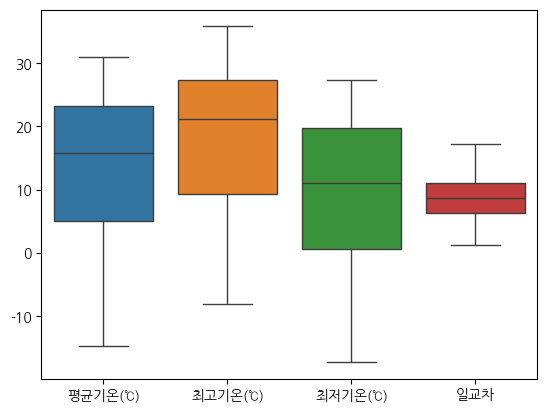

In [66]:
#수치형 데이터 이상치 확인
sns.boxplot(daily_average_temp_23_df[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차']])

plt.subplots_adjust(wspace=0.4)
plt.show()

In [67]:
# 가공한 데이터프레임 csv로 추출
# daily_average_temp_23_df.to_csv('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/서울 2023년 일별 평균 기온.csv', index=False)

## 초기 탐색

***초기 탐색 파트에서 보여지는 시각화는 표본추출 데이터 기반이기 때문에 보고서와 조금 차이가 있을 수 있습니다.***

### 집계 테이블 생성

서울시 공공자전거 대여이력 정보 시간대별 데이터로 월별, 요일별, 시간대별 총 집계 테이블 만들기

In [68]:
new_bike_rent_return_23_df

,대여일시,반납일시,이용시간(분),이용거리(M),생년,대여대여소명,반납대여소명
0,2023-01-26 00:08:19,2023-01-26 00:18:22,10,1438.74,1969,센트럴 푸르지오 시티 앞,영등포구청역 1번출구
1,2023-01-31 00:26:23,2023-01-31 00:28:49,2,260.00,1995,보문역6번출구 앞,용문2교 옆
2,2023-01-27 00:39:28,2023-01-27 00:45:22,5,760.59,1994,센트럴 푸르지오 시티 앞,영등포유통상가 사거리
3,2023-01-01 00:52:11,2023-01-01 01:23:19,31,3900.00,2003,종로구청 옆,남영역 건너편
4,2023-01-23 00:21:15,2023-01-23 00:31:55,10,1925.04,1994,증산교 앞,응암오거리
...,...,...,...,...,...,...,...
217616,2023-12-04 23:10:32,2023-12-04 23:23:03,12,2300.00,2005,기쁜우리복지관,염창동 한마음아파트 앞
217617,2023-12-08 23:22:26,2023-12-08 23:38:11,15,2358.52,1992,마포구청역,연희IC 남측
217618,2023-12-05 23:36:20,2023-12-05 23:47:36,11,1753.75,1994,용두역 4번출구,안암2교 옆
217619,2023-12-03 23:40:33,2023-12-03 23:47:15,6,1388.01,1999,쌍문역4번출구 주변,쌍문현대1차아파트 108동 앞


In [69]:
# datetime 유형으로 바꾸기
new_bike_rent_return_23_df['대여일시'] = pd.to_datetime(new_bike_rent_return_23_df['대여일시'])
new_bike_rent_return_23_df['반납일시'] = pd.to_datetime(new_bike_rent_return_23_df['반납일시'])

In [70]:
# 월별 총 대여건수, 이용거리, 이용시간
# 월을 추출하여 새로운 '월' 컬럼 생성
new_bike_rent_return_23_df['월'] = new_bike_rent_return_23_df['대여일시'].dt.to_period('M')

# 월별로 그룹화하여 카운트, 이용시간(분)과 이용거리(M)의 총합 계산
monthly_summary_df = new_bike_rent_return_23_df.groupby('월').agg({
    '대여일시': 'count',       # 대여 건수 카운트
    '이용시간(분)': 'sum',      # 이용시간 합계
    '이용거리(M)': 'sum'       # 이용거리 합계
}).rename(columns={'대여일시': '대여건수'}).reset_index()


# 이용거리를 미터에서 킬로미터로 변환 (미터를 1000으로 나누기)
monthly_summary_df['이용거리(KM)'] = monthly_summary_df['이용거리(M)'] / 1000

# 이용거리를 소수점 2자리까지 반올림
monthly_summary_df['이용거리(KM)'] = monthly_summary_df['이용거리(KM)'].round(0)

# 이용시간(분)을 시간으로 변환 (분을 60으로 나누기)
monthly_summary_df['이용시간(시간)'] = monthly_summary_df['이용시간(분)'] / 60

# 이용시간을 소수점 2자리까지 반올림
monthly_summary_df['이용시간(시간)'] = monthly_summary_df['이용시간(시간)'].round(0)

# 기존 열 제거 (선택 사항)
monthly_summary_df.drop(columns=['이용거리(M)', '이용시간(분)'], inplace=True)

# '월' 열에서 월 정보만 추출
monthly_summary_df['월'] = monthly_summary_df['월'].dt.month

# 새로운 데이터프레임 확인
print(monthly_summary_df)

     월    대여건수   이용거리(KM)  이용시간(시간)
0    1  153491   307284.0   47316.0
1    2  217724   490781.0   71804.0
2    3  380017   977971.0  137476.0
3    4  400160  1061330.0  149280.0
4    5  486243  1310748.0  181355.0
5    6  484134  1273359.0  176797.0
6    7  385360   921395.0  132312.0
7    8  385409   930258.0  133625.0
8    9  445730  1170335.0  167341.0
9   10  518683  1325334.0  191854.0
10  11  333829   646512.0  102901.0
11  12  205449   403137.0   61725.0


In [71]:
new_bike_rent_return_23_df['대여일자'] = new_bike_rent_return_23_df['대여일시'].dt.day

In [72]:
# 일별 총 대여건수, 이용거리, 이용시간
# '대여일시'에서 '년-월-일' 형식으로 변환하여 새로운 열에 저장
new_bike_rent_return_23_df['대여일자'] = new_bike_rent_return_23_df['대여일시'].dt.strftime('%Y-%m-%d')

# 요일을 추출하여 새로운 '요일' 컬럼 생성 (0 = 월요일, 6 = 일요일)
new_bike_rent_return_23_df['요일'] = new_bike_rent_return_23_df['대여일시'].dt.dayofweek

# 숫자를 요일명으로 맵핑
day_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
new_bike_rent_return_23_df['요일'] = new_bike_rent_return_23_df['요일'].map(day_map)


# 일별로 그룹화하여 카운트, 이용시간(분)과 이용거리(M)의 총합 계산
daily_summary_df = new_bike_rent_return_23_df.groupby(['대여일자','요일']).agg({
    '대여일시': 'count',       # 대여 건수 카운트
    '이용시간(분)': 'sum',      # 이용시간 합계
    '이용거리(M)': 'sum'       # 이용거리 합계
}).rename(columns={'대여일시': '대여건수'}).reset_index()


# 이용거리를 미터에서 킬로미터로 변환 (미터를 1000으로 나누기)
daily_summary_df['이용거리(KM)'] = daily_summary_df['이용거리(M)'] / 1000

# 이용거리를 소수점 2자리까지 반올림
daily_summary_df['이용거리(KM)'] = daily_summary_df['이용거리(KM)'].round(0)

# 이용시간(분)을 시간으로 변환 (분을 60으로 나누기)
daily_summary_df['이용시간(시간)'] = daily_summary_df['이용시간(분)'] / 60

# 이용시간을 소수점 2자리까지 반올림
daily_summary_df['이용시간(시간)'] = daily_summary_df['이용시간(시간)'].round(0)

# 기존 열 제거 (선택 사항)
daily_summary_df.drop(columns=['이용거리(M)', '이용시간(분)'], inplace=True)


# 새로운 데이터프레임 확인
print(daily_summary_df)

           대여일자 요일  대여건수  이용거리(KM)  이용시간(시간)
0    2023-01-01  일  3847    9100.0    1370.0
1    2023-01-02  월  5358   10072.0    1521.0
2    2023-01-03  화  6058   11548.0    1765.0
3    2023-01-04  수  6539   12555.0    1906.0
4    2023-01-05  목  6600   12759.0    1950.0
..          ... ..   ...       ...       ...
360  2023-12-27  수  8042   15462.0    2423.0
361  2023-12-28  목  7793   15027.0    2270.0
362  2023-12-29  금  8134   15975.0    2479.0
363  2023-12-30  토  1466    2694.0     420.0
364  2023-12-31  일  2703    5466.0     914.0

[365 rows x 5 columns]


In [73]:
# 주말과 평일 구분 열 추가
new_bike_rent_return_23_df['주말/평일'] = new_bike_rent_return_23_df['요일'].apply(lambda x: '주말' if x in ['토', '일'] else '평일')

# 결과 확인
new_bike_rent_return_23_df

,대여일시,반납일시,이용시간(분),이용거리(M),생년,대여대여소명,반납대여소명,월,대여일자,요일,주말/평일
0,2023-01-26 00:08:19,2023-01-26 00:18:22,10,1438.74,1969,센트럴 푸르지오 시티 앞,영등포구청역 1번출구,2023-01,2023-01-26,목,평일
1,2023-01-31 00:26:23,2023-01-31 00:28:49,2,260.00,1995,보문역6번출구 앞,용문2교 옆,2023-01,2023-01-31,화,평일
2,2023-01-27 00:39:28,2023-01-27 00:45:22,5,760.59,1994,센트럴 푸르지오 시티 앞,영등포유통상가 사거리,2023-01,2023-01-27,금,평일
3,2023-01-01 00:52:11,2023-01-01 01:23:19,31,3900.00,2003,종로구청 옆,남영역 건너편,2023-01,2023-01-01,일,주말
4,2023-01-23 00:21:15,2023-01-23 00:31:55,10,1925.04,1994,증산교 앞,응암오거리,2023-01,2023-01-23,월,평일
...,...,...,...,...,...,...,...,...,...,...,...
217616,2023-12-04 23:10:32,2023-12-04 23:23:03,12,2300.00,2005,기쁜우리복지관,염창동 한마음아파트 앞,2023-12,2023-12-04,월,평일
217617,2023-12-08 23:22:26,2023-12-08 23:38:11,15,2358.52,1992,마포구청역,연희IC 남측,2023-12,2023-12-08,금,평일
217618,2023-12-05 23:36:20,2023-12-05 23:47:36,11,1753.75,1994,용두역 4번출구,안암2교 옆,2023-12,2023-12-05,화,평일
217619,2023-12-03 23:40:33,2023-12-03 23:47:15,6,1388.01,1999,쌍문역4번출구 주변,쌍문현대1차아파트 108동 앞,2023-12,2023-12-03,일,주말


In [74]:
# 주말/평일, 대여시간 별 총 대여시간, 이용건수, 이동거리(KM)
# 시간대 열 만들기
new_bike_rent_return_23_df['시간대'] = new_bike_rent_return_23_df['대여일시'].dt.hour

# 주말/평일, 대여시간 별로 카운트, 이용시간(분)과 이용거리(M)의 총합 계산
time_summary_df = new_bike_rent_return_23_df.groupby(['주말/평일', '시간대']).agg({
    '대여일시': 'count',
    '이용거리(M)': 'sum',
    '이용시간(분)': 'sum'
}).rename(columns={'대여일시': '대여건수'}).reset_index()


# 이용거리를 미터에서 킬로미터로 변환 (미터를 1000으로 나누기)
time_summary_df['이용거리(KM)'] = time_summary_df['이용거리(M)'] / 1000

# 이용거리를 소수점 2자리까지 반올림
time_summary_df['이용거리(KM)'] = time_summary_df['이용거리(KM)'].round(0)

# 이용시간(분)을 시간으로 변환 (분을 60으로 나누기)
time_summary_df['이용시간(시간)'] = time_summary_df['이용시간(분)'] / 60

# 이용시간을 소수점 2자리까지 반올림
time_summary_df['이용시간(시간)'] = time_summary_df['이용시간(시간)'].round(0)

# 기존 열 제거 (선택 사항)
time_summary_df.drop(columns=['이용거리(M)', '이용시간(분)'], inplace=True)

# 결과 확인
time_summary_df

,주말/평일,시간대,대여건수,이용거리(KM),이용시간(시간)
0,주말,0,32974,84968.0,10721.0
1,주말,1,22848,60065.0,7530.0
2,주말,2,15603,39810.0,4986.0
3,주말,3,10492,25981.0,3249.0
4,주말,4,7337,18556.0,2245.0
5,주말,5,8010,20247.0,2471.0
6,주말,6,11946,33136.0,3992.0
7,주말,7,18649,52003.0,6396.0
8,주말,8,30811,73269.0,9583.0
9,주말,9,39131,93290.0,13324.0


### 공공자전거 자치구별 이용 분포

In [75]:
# 자치구별로 그룹화하여 총 대여건수를 계산
gu_rent_spot_df = monthly_rent_spot_23_df.groupby(['자치구'])['대여건수'].sum().reset_index()

# 대여건수를 만 단위로 변환
gu_rent_spot_df['대여건수'] = gu_rent_spot_df['대여건수'] / 10000

# 열 이름을 "대여건수(단위: 만)"으로 변경
gu_rent_spot_df.rename(columns={'대여건수': '대여건수(단위: 만)'}, inplace=True)

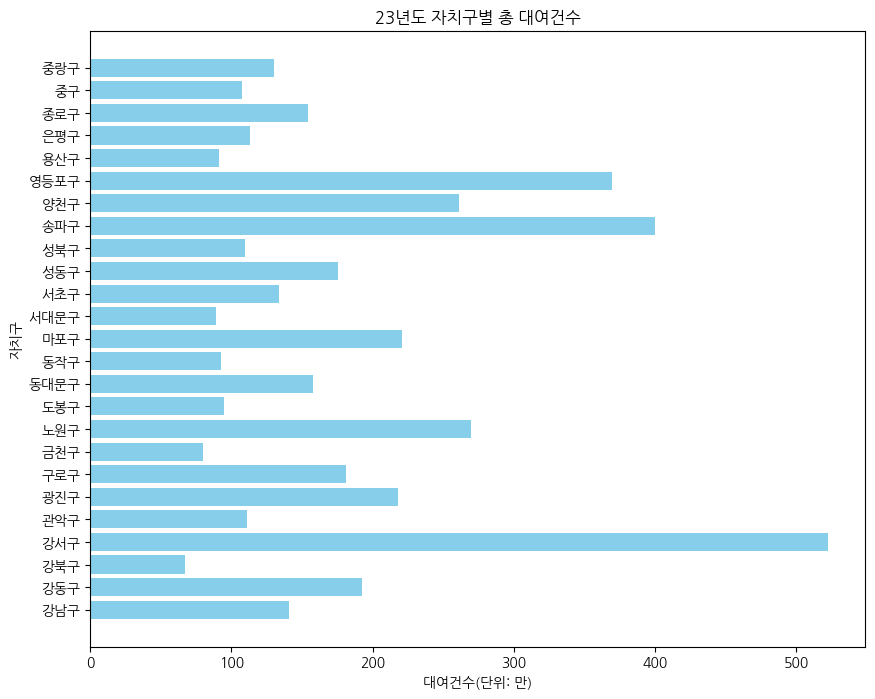

In [76]:
# 막대그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(gu_rent_spot_df['자치구'], gu_rent_spot_df['대여건수(단위: 만)'], color='skyblue')
plt.xlabel('대여건수(단위: 만)')
plt.ylabel('자치구')
plt.title('23년도 자치구별 총 대여건수')
plt.show()

**강서구, 송파구, 영등포구가 상대적으로 높은 이용건수를 가지고 있다. 그렇다면 이 상위 3개의 자치구 내에 대여소별 분포는 어떨까?**

In [77]:
monthly_rent_spot_23_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202301,383,439
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202301,433,446
2,강남구,2303. 논현역 10번출구,202301,648,508
3,강남구,2304. 대현그린타워,202301,76,55
4,강남구,2305. MCM 본사 직영점 앞,202301,172,179
...,...,...,...,...,...
16376,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202312,951,996
16377,양천구,723. SBS방송국,202312,1707,1679
16378,양천구,724. 계남공원 입구 주출입구 좌측,202312,138,94
16379,양천구,725. 양강중학교앞 교차로,202312,299,138


In [78]:
top3_qu_rent_spot_23_df = monthly_rent_spot_23_df[(monthly_rent_spot_23_df['자치구'] == '강서구') | (monthly_rent_spot_23_df['자치구'] == '송파구') | (monthly_rent_spot_23_df['자치구'] == '영등포구')]

# 대여소명에서 숫자와 점을 분리하여 대여소번호와 대여소명_숫자 열을 생성
top3_qu_rent_spot_23_df.loc[:, '대여소번호'] = top3_qu_rent_spot_23_df['대여소명'].apply(lambda x: re.match(r'(\d+)\.', x).group(1))
top3_qu_rent_spot_23_df.loc[:, '대여소명'] = top3_qu_rent_spot_23_df['대여소명'].apply(lambda x: re.sub(r'^\d+\.\s*', '', x))

top3_qu_rent_spot_23_df

<ipython-input-78-5ada66129d97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_qu_rent_spot_23_df.loc[:, '대여소번호'] = top3_qu_rent_spot_23_df['대여소명'].apply(lambda x: re.match(r'(\d+)\.', x).group(1))


,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호
349,강서구,개화동상사마을종점 버스정류장,202301,177,179,1101
350,강서구,방화사거리 마을버스 버스정류장,202301,1179,1194,1102
351,강서구,방화역 4번출구앞,202301,1235,1266,1103
352,강서구,방화근린공원,202301,116,92,1105
353,강서구,신방화사거리,202301,1730,1758,1106
...,...,...,...,...,...,...
16295,송파구,방이초등학교,202312,1557,1289,1248
16315,송파구,거여역 3번출구,202312,842,826,1204
16318,송파구,삼전역 4번출구,202312,1070,1086,1221
16359,강서구,신방화역환승주차장,202312,2669,2628,1149


In [79]:
top3_qu_rent_spot_23_df[['대여소번호','대여소명']].groupby('대여소번호').filter(lambda x: x['대여소명'].nunique() > 1)

,대여소번호,대여소명
349,1101,개화동상사마을종점 버스정류장
1823,1277,성내6교
1903,4464,올림픽공원 북2문
1915,4481,올림픽공원 북2문 2
2150,279,영등포 푸르지오 아파트
...,...,...
14532,3214,영등포 푸르지오 아파트 A
15046,4464,올림픽공원 북2문 A
15058,4481,올림픽공원 북2문 B
15110,4580,국회제2의원회관


In [80]:
# 대여대여소ID를 기준으로 그룹화하고, 각 ID별로 유일한 대여 대여소명 추출
grouped_spot_number = top3_qu_rent_spot_23_df.groupby('대여소번호')['대여소명'].unique()

# 결과
grouped_spot_number = grouped_spot_number.reset_index()
grouped_spot_number.columns = ['대여소번호', '다른 대여 대여소명']

In [81]:
# 딕셔너리 생성: 대여대여소ID를 키로 하고, 리스트의 마지막 값을 값으로 설정
spot_number_dict = grouped_spot_number.set_index('대여소번호')['다른 대여 대여소명'].apply(lambda x: x[-1]).to_dict()

# 딕셔너리를 데이터프레임의 대여소명 열에 매핑
top3_qu_rent_spot_23_df.loc[:, '대여소명'] = top3_qu_rent_spot_23_df['대여소번호'].map(spot_number_dict)
top3_qu_rent_spot_23_df

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호
349,강서구,상사마을 버스정류장(아라대교방면),202301,177,179,1101
350,강서구,방화사거리 마을버스 버스정류장,202301,1179,1194,1102
351,강서구,방화역 4번출구앞,202301,1235,1266,1103
352,강서구,방화근린공원,202301,116,92,1105
353,강서구,신방화사거리,202301,1730,1758,1106
...,...,...,...,...,...,...
16295,송파구,방이초등학교,202312,1557,1289,1248
16315,송파구,거여역 3번출구,202312,842,826,1204
16318,송파구,삼전역 4번출구,202312,1070,1086,1221
16359,강서구,신방화역환승주차장,202312,2669,2628,1149


Text(0, 0.5, '대여소명')

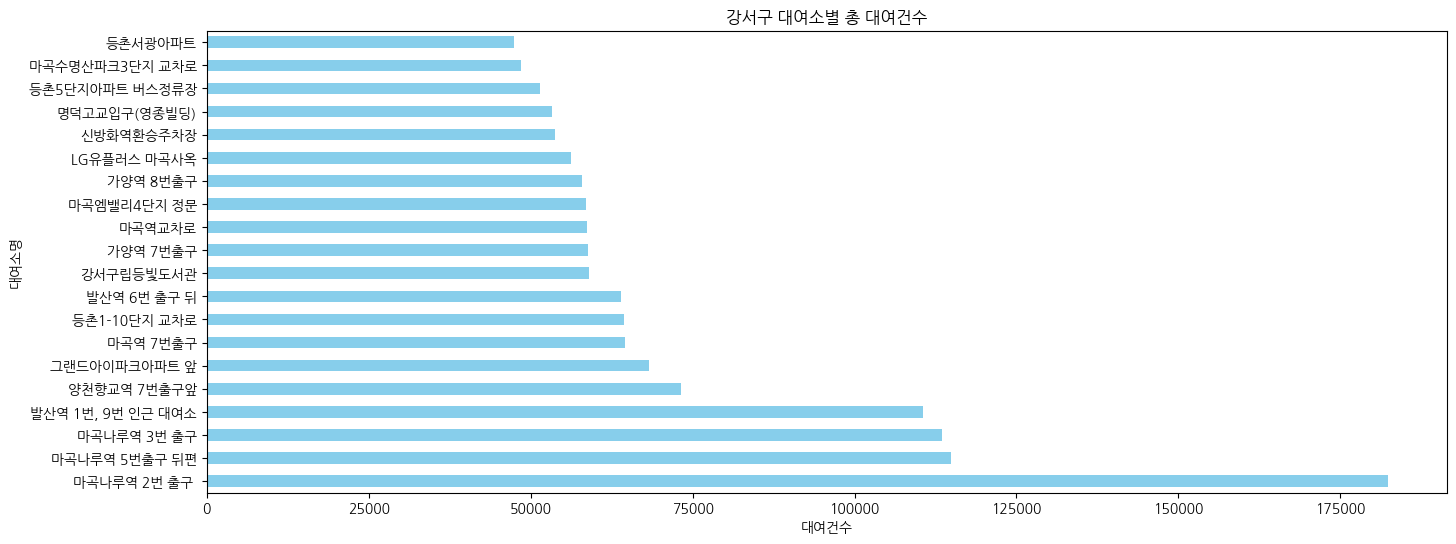

In [82]:
# 1. 자치구가 강서구인 행 필터링
gangseo_df = top3_qu_rent_spot_23_df[top3_qu_rent_spot_23_df['자치구'] == '강서구']

# 2. 대여소명으로 그룹화하여 대여건수 합계 계산
gangseo_counts_by_spot = gangseo_df.groupby('대여소명')['대여건수'].sum()

# 상위 10개 대여소만 선택
top_gangseo_counts_by_spot = gangseo_counts_by_spot.nlargest(20)

# 3. 가로 막대그래프로 시각화
plt.figure(figsize=(16, 6))
top_gangseo_counts_by_spot.plot(kind='barh', color='skyblue')

# 그래프 제목과 라벨 추가
plt.title('강서구 대여소별 총 대여건수')
plt.xlabel('대여건수')
plt.ylabel('대여소명')

Text(0, 0.5, '대여소명')

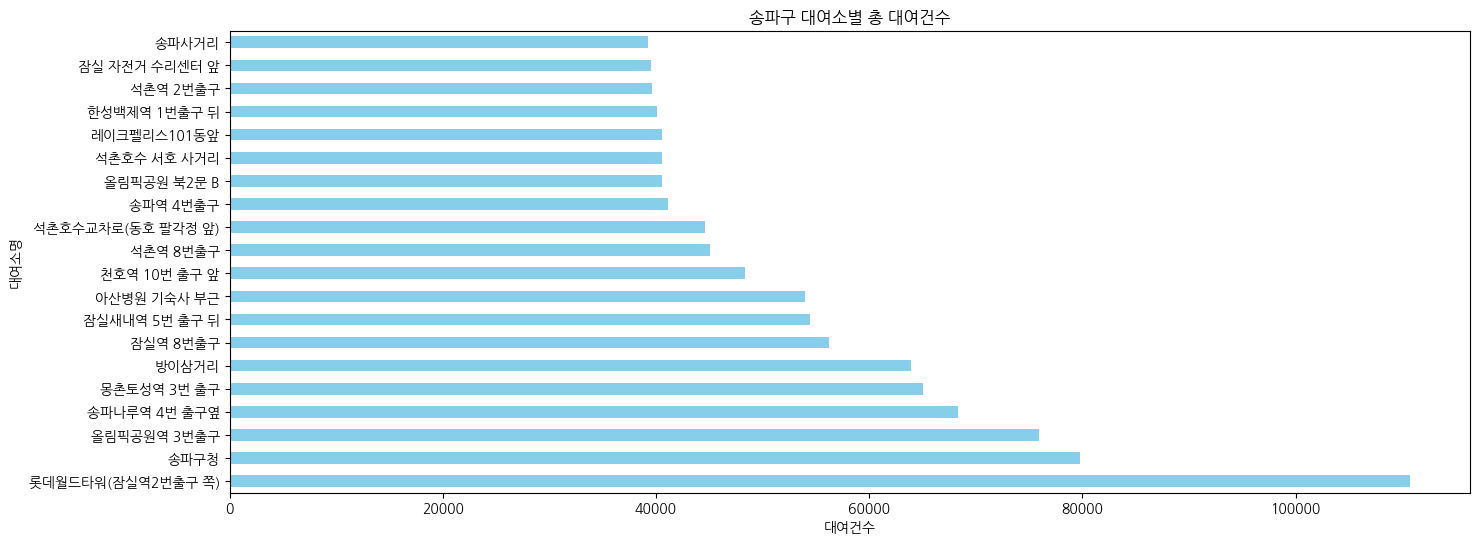

In [83]:
# 1. 자치구가 강서구인 행 필터링
gangseo_df = top3_qu_rent_spot_23_df[top3_qu_rent_spot_23_df['자치구'] == '송파구']

# 2. 대여소명으로 그룹화하여 대여건수 합계 계산
gangseo_counts_by_spot = gangseo_df.groupby('대여소명')['대여건수'].sum()

# 상위 10개 대여소만 선택
top_gangseo_counts_by_spot = gangseo_counts_by_spot.nlargest(20)

# 3. 가로 막대그래프로 시각화
plt.figure(figsize=(16, 6))
top_gangseo_counts_by_spot.plot(kind='barh', color='skyblue')

# 그래프 제목과 라벨 추가
plt.title('송파구 대여소별 총 대여건수')
plt.xlabel('대여건수')
plt.ylabel('대여소명')

Text(0, 0.5, '대여소명')

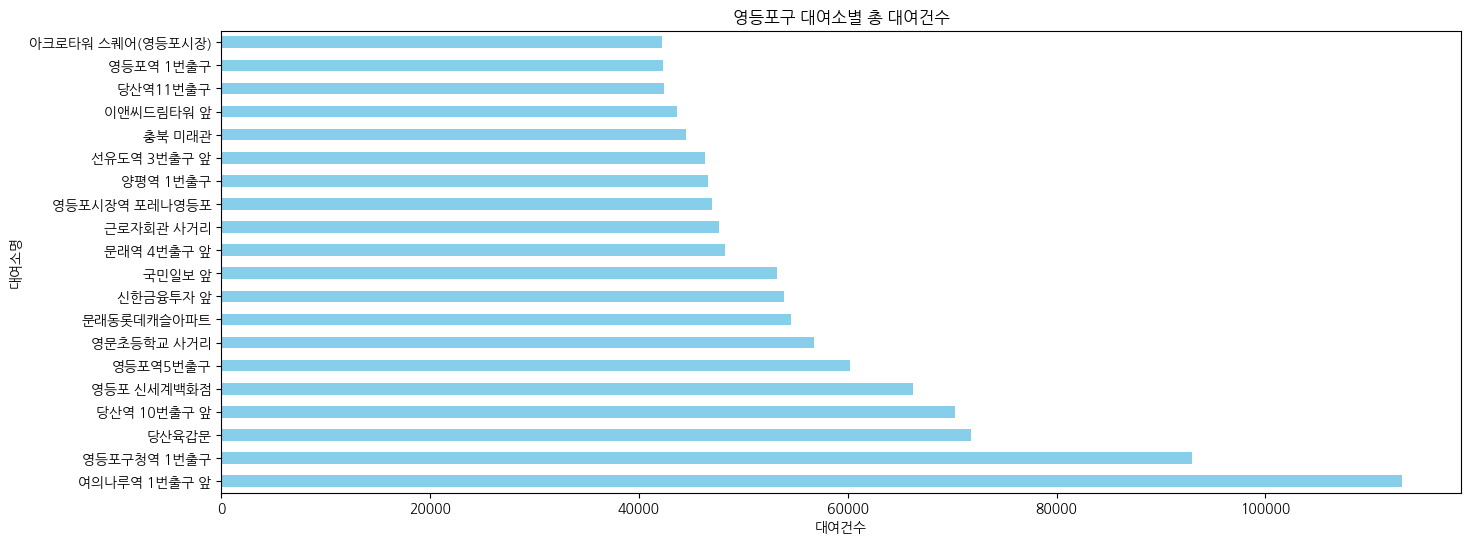

In [84]:
# 1. 자치구가 강서구인 행 필터링
gangseo_df = top3_qu_rent_spot_23_df[top3_qu_rent_spot_23_df['자치구'] == '영등포구']

# 2. 대여소명으로 그룹화하여 대여건수 합계 계산
gangseo_counts_by_spot = gangseo_df.groupby('대여소명')['대여건수'].sum()

# 상위 10개 대여소만 선택
top_gangseo_counts_by_spot = gangseo_counts_by_spot.nlargest(20)

# 3. 가로 막대그래프로 시각화
plt.figure(figsize=(16, 6))
top_gangseo_counts_by_spot.plot(kind='barh', color='skyblue')

# 그래프 제목과 라벨 추가
plt.title('영등포구 대여소별 총 대여건수')
plt.xlabel('대여건수')
plt.ylabel('대여소명')

**상위 3개 자치구에서 상위 20개의 대여소 분포를 본 결과 상위 대여소만 추출했음에도 불구하고 특정 대여소가 높은 것으로 보인다.**

**특정 몇개의 대여소 이용건수로 자치구의 이용건수가 높아지는 것을 알 수 있기 때문에 자치구별로 이용건수를 판단해서 편차 개선을 하는 건 의미가 없다고 판단했다.**

**-> 자치구보다 시간적인 개념으로 이용률 편차를 보고자 함.**

*보고서에서는 보기 편하도록 상위 5개의 대여소 분포만 시각화*

### 공공자전거 월별 이용 분포

In [85]:
# 데이터 타입 확인
monthly_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   월         12 non-null     int64  
 1   대여건수      12 non-null     int64  
 2   이용거리(KM)  12 non-null     float64
 3   이용시간(시간)  12 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 512.0 bytes


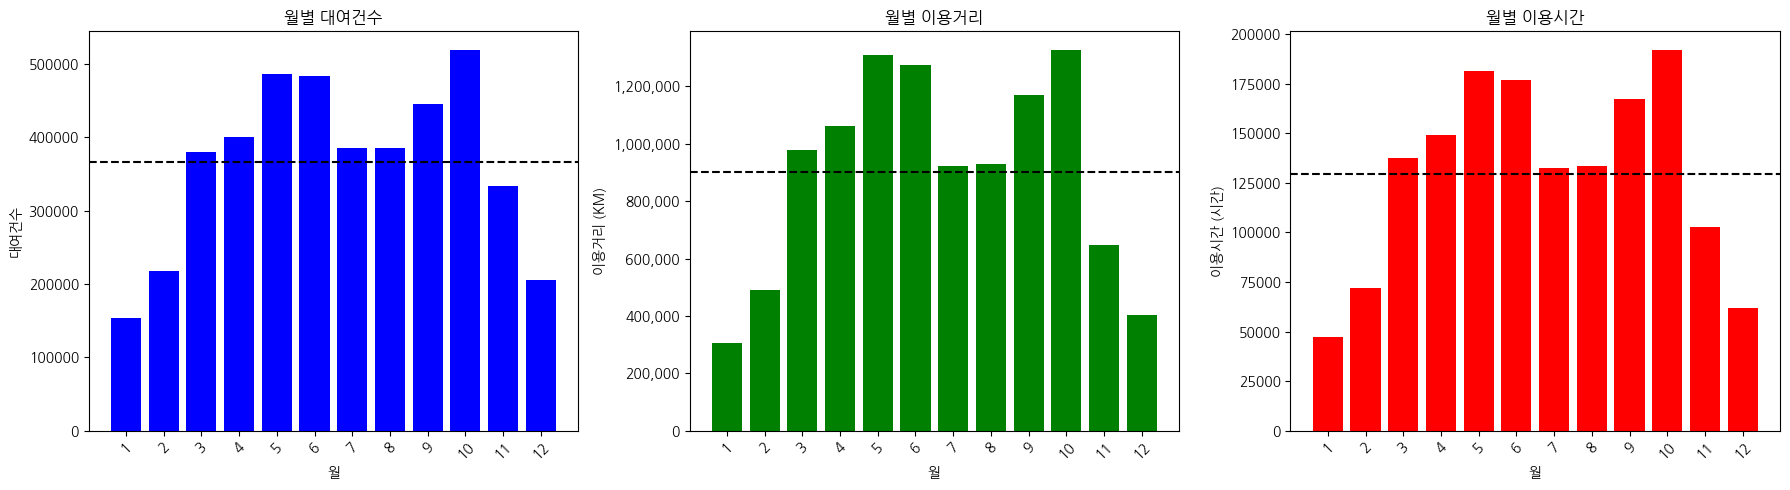

In [86]:
monthly_summary_df['월'] = monthly_summary_df['월'].astype('str')

month_mean = monthly_summary_df['대여건수'].mean()
month_km_mean = monthly_summary_df['이용거리(KM)'].mean()
month_time_mean = monthly_summary_df['이용시간(시간)'].mean()


# 그래프 크기 설정
plt.figure(figsize=(18, 5))



# 대여건수 그래프
plt.subplot(1, 3, 1)
plt.bar(monthly_summary_df['월'], monthly_summary_df['대여건수'], color='b')
plt.axhline(y=month_mean, color='black', linestyle='--', label=f'평균: {month_mean:.2f}')
plt.xlabel('월')
plt.ylabel('대여건수')
plt.title('월별 대여건수')
plt.xticks(rotation=45)



# 이용거리(KM) 그래프
plt.subplot(1, 3, 2)
plt.bar(monthly_summary_df['월'], monthly_summary_df['이용거리(KM)'], color='g')
# 이용건수 크기가 너무 커서 형식 설정
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.axhline(y=month_km_mean, color='black', linestyle='--', label=f'평균: {month_km_mean:.2f}')
plt.xlabel('월')
plt.ylabel('이용거리 (KM)')
plt.title('월별 이용거리')
plt.xticks(rotation=45)



# 이용시간(시간) 그래프
plt.subplot(1, 3, 3)
plt.bar(monthly_summary_df['월'], monthly_summary_df['이용시간(시간)'], color='r')
plt.axhline(y=month_time_mean, color='black', linestyle='--', label=f'평균: {month_time_mean:.2f}')
plt.xlabel('월')
plt.ylabel('이용시간 (시간)')
plt.title('월별 이용시간')
plt.xticks(rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

**11월 ~ 2월은 평균보다 낮은 이용 분포를 보이고 이외에는 상승하다가 7~8월에 잠시 주춤하는 분포를 보인다.**

**그렇다면 공공자전거 이용건수는 계절 즉, 기온과 관계를 가지고 있지 않을까?**

In [87]:
daily_average_temp_23_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점번호     365 non-null    int64         
 1   지점명      365 non-null    object        
 2   일시       365 non-null    datetime64[ns]
 3   평균기온(℃)  365 non-null    float64       
 4   최고기온(℃)  365 non-null    float64       
 5   최고기온시각   365 non-null    datetime64[ns]
 6   최저기온(℃)  365 non-null    float64       
 7   최저기온시각   365 non-null    datetime64[ns]
 8   일교차      365 non-null    float64       
dtypes: datetime64[ns](3), float64(4), int64(1), object(1)
memory usage: 25.8+ KB


In [88]:
daily_average_temp_23_df.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,108,서울,2023-01-01,-0.2,3.8,1900-01-01 13:43:00,-4.3,1900-01-01 23:50:00,8.1
1,108,서울,2023-01-02,-4.5,-0.4,1900-01-01 15:25:00,-7.4,1900-01-01 08:04:00,7.0
2,108,서울,2023-01-03,-5.0,0.6,1900-01-01 15:55:00,-9.0,1900-01-01 05:51:00,9.6
3,108,서울,2023-01-04,-1.8,3.3,1900-01-01 15:10:00,-5.7,1900-01-01 02:29:00,9.0
4,108,서울,2023-01-05,-1.6,3.6,1900-01-01 15:36:00,-5.6,1900-01-01 07:49:00,9.2


In [89]:
# 일시와 대여일자를 동일한 형식으로 변환
daily_average_temp_23_df['일시'] = pd.to_datetime(daily_average_temp_23_df['일시'])
daily_summary_df['대여일자'] = pd.to_datetime(daily_summary_df['대여일자'])

# 데이터프레임 조인
merged_temp_utility_df = pd.merge(daily_average_temp_23_df, daily_summary_df, left_on='일시', right_on='대여일자', how='inner')

# 결과 확인
print(merged_temp_utility_df.head())

   지점번호 지점명         일시  평균기온(℃)  최고기온(℃)              최고기온시각  최저기온(℃)  \
0   108  서울 2023-01-01     -0.2      3.8 1900-01-01 13:43:00     -4.3   
1   108  서울 2023-01-02     -4.5     -0.4 1900-01-01 15:25:00     -7.4   
2   108  서울 2023-01-03     -5.0      0.6 1900-01-01 15:55:00     -9.0   
3   108  서울 2023-01-04     -1.8      3.3 1900-01-01 15:10:00     -5.7   
4   108  서울 2023-01-05     -1.6      3.6 1900-01-01 15:36:00     -5.6   

               최저기온시각  일교차       대여일자 요일  대여건수  이용거리(KM)  이용시간(시간)  
0 1900-01-01 23:50:00  8.1 2023-01-01  일  3847    9100.0    1370.0  
1 1900-01-01 08:04:00  7.0 2023-01-02  월  5358   10072.0    1521.0  
2 1900-01-01 05:51:00  9.6 2023-01-03  화  6058   11548.0    1765.0  
3 1900-01-01 02:29:00  9.0 2023-01-04  수  6539   12555.0    1906.0  
4 1900-01-01 07:49:00  9.2 2023-01-05  목  6600   12759.0    1950.0  


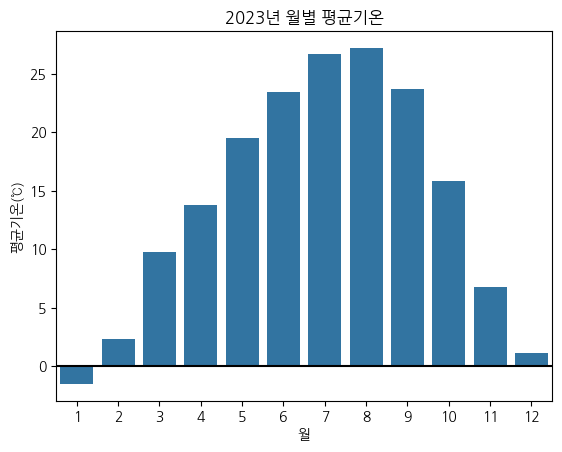

In [90]:
# '일시'에서 월을 추출하여 새로운 열 생성
daily_average_temp_23_df['월'] = daily_average_temp_23_df['일시'].dt.month

# 월별로 평균기온의 평균 계산
monthly_mean_temp = daily_average_temp_23_df.groupby('월')['평균기온(℃)'].mean().reset_index()


sns.barplot(data=monthly_mean_temp,x='월',y='평균기온(℃)')
plt.axhline(0, color='black', linestyle='-')
plt.xticks(rotation=0)
plt.title('2023년 월별 평균기온')
plt.show()

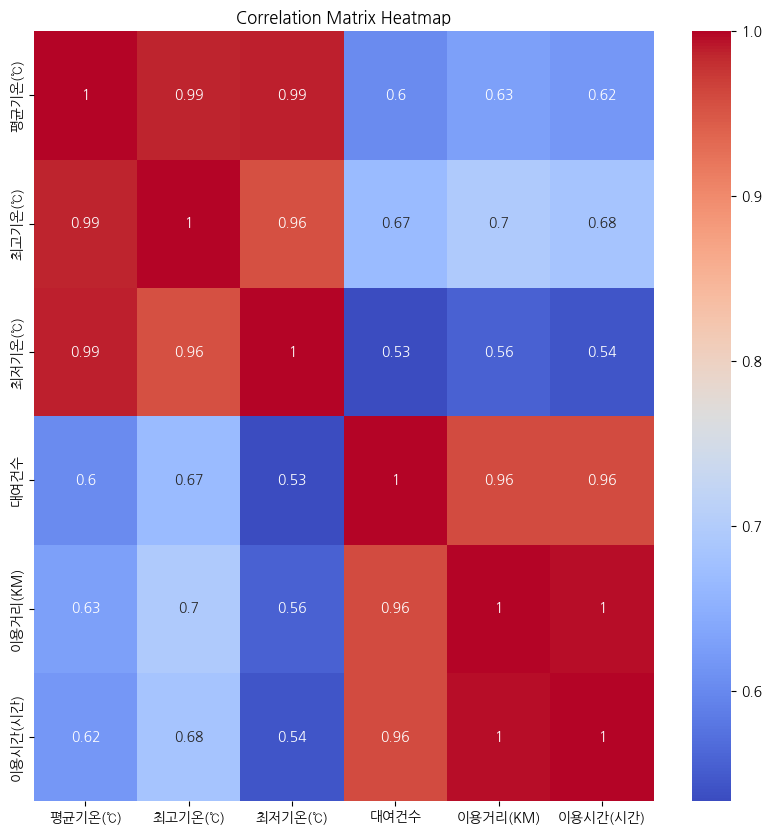

In [91]:
# # 상관관계 계산
# corr_matrix = merged_temp_utility_df[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '대여건수', '이용거리(KM)', '이용시간(시간)']].corr()

# # 히트맵 시각화
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)

# # 그래프 표시
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# 상관관계 계산
corr_matrix = merged_temp_utility_df[['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '대여건수', '이용거리(KM)', '이용시간(시간)']].corr()

plt.figure(figsize=(10, 10))

# 히트맵 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=True)

# 그래프 표시
plt.xticks(rotation=0)  # X축 라벨을 0도 회전 (똑바로 표시)
plt.title('Correlation Matrix Heatmap')
plt.show()

**공공자전거 대여건수, 이용거리, 이용시간은 평균기온, 최고기온, 최저기온과 강한 양의 상관관계가 있다.**

**인과관계를 생각해본 결과 이용건수가 기온에 영향을 미칠리는 없다.**

**-> 기온이 이용건수에 영향을 미치는지 파악해보고자함**

In [92]:
# 기온이 이용건수에 영향을 미치는지 회귀분석
# 독립 변수와 종속 변수 설정
X = merged_temp_utility_df['평균기온(℃)']
y = merged_temp_utility_df['대여건수']

# 절편 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   대여건수   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.48e-37
Time:                        08:03:14   Log-Likelihood:                -3562.3
No. Observations:                 365   AIC:                             7129.
Df Residuals:                     363   BIC:                             7136.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7807.0945    367.206     21.261      0.0

**P-value가 유의수준으로 지정한 0.05 보다 낮아 기온이 이용건수에 영향을 미치는 것을 알 수 있고 기온이 올라갈수록 이용건수가 올라간다고 판단할 수 있다.**

Text(0, 0.5, '대여 건수')

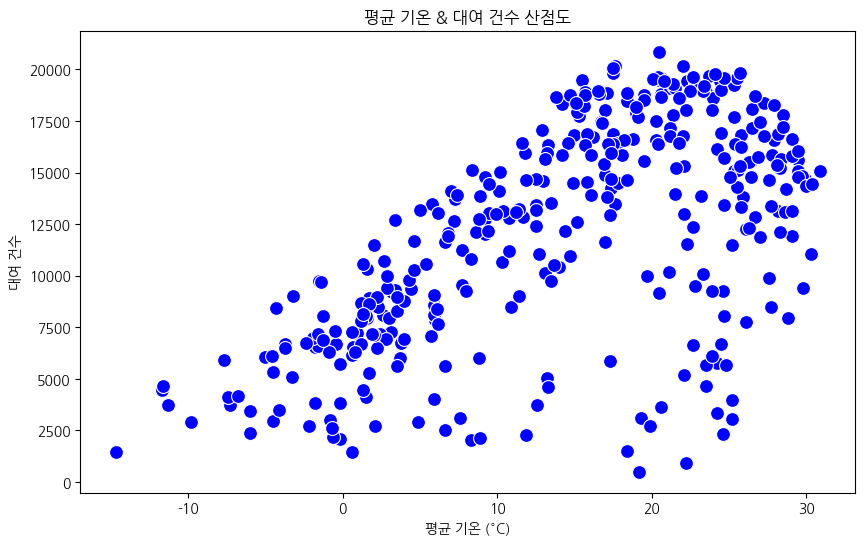

In [93]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='평균기온(℃)', y='대여건수', data=merged_temp_utility_df, marker='o', s=100, color='blue')

# 제목과 레이블 추가
plt.title('평균 기온 & 대여 건수 산점도')
plt.xlabel('평균 기온 (°C)')
plt.ylabel('대여 건수')

**분석 결과, 계절이 겨울로 변하고 봄이 되기 전인 11월 ~ 2월에는 기온이 낮아져 이용건수가 낮아진다고 해석할 수 있다.**

**오히려 한여름인 7, 8월에 이용건수가 조금 하락하는 것은 산점도 확인 결과, 25℃이상이면 이용건수가 내려가므로 너무 더워지면 공공자전거 이용을 안하는 것으로 생각해볼 수 있다.**

**-> 월별 이용률 편차의 원인을 파악해본 결과, 기온의 영향이 크기 때문에 월별로 이용률 편차 개선하기에 한계가 있다고 판단**

### 공공자전거 요일별 이용 분포

In [94]:
daily_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   대여일자      365 non-null    datetime64[ns]
 1   요일        365 non-null    object        
 2   대여건수      365 non-null    int64         
 3   이용거리(KM)  365 non-null    float64       
 4   이용시간(시간)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 14.4+ KB


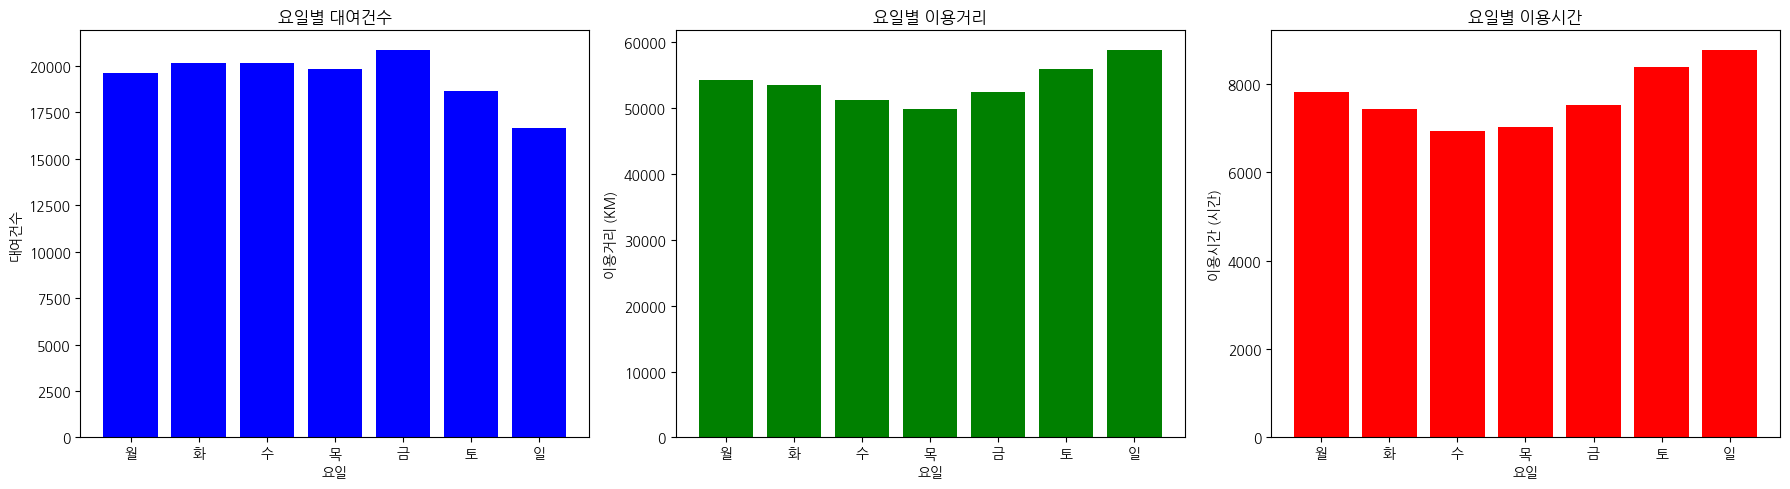

In [95]:
# 요일 순서 설정
day_of_week_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일 열을 카테고리 타입으로 변환하고 순서 설정
daily_summary_df['요일'] = pd.Categorical(daily_summary_df['요일'], categories=day_of_week_order, ordered=True)

# 요일 순서에 따라 데이터프레임 정렬
daily_summary_df = daily_summary_df.sort_values('요일')

# 그래프 크기 설정
plt.figure(figsize=(18, 5))

# 이용건수 그래프
plt.subplot(1, 3, 1)
plt.bar(daily_summary_df['요일'], daily_summary_df['대여건수'], color='b')
plt.xlabel('요일')
plt.ylabel('대여건수')
plt.title('요일별 대여건수')
plt.xticks(rotation=0)

# 이동거리(KM) 그래프
plt.subplot(1, 3, 2)
plt.bar(daily_summary_df['요일'], daily_summary_df['이용거리(KM)'], color='g')
plt.xlabel('요일')
plt.ylabel('이용거리 (KM)')
plt.title('요일별 이용거리')
plt.xticks(rotation=0)

# 이용시간(시간) 그래프
plt.subplot(1, 3, 3)
plt.bar(daily_summary_df['요일'], daily_summary_df['이용시간(시간)'], color='r')
plt.xlabel('요일')
plt.ylabel('이용시간 (시간)')
plt.title('요일별 이용시간')
plt.xticks(rotation=0)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

**분석 결과, 대체적으로 공공자전거 요일별 대여건수는 균등한 이용분포를 보이지만 토요일, 일요일에는 월요일~금요일에 비해 대여건수가 조금 낮다.**

**하지만 토요일, 일요일에는 이용거리, 이용시간이 높아 요일별 분석에서는 편차를 판단하기 어렵다. 그렇다면 평일과 주말에는 어떤 시간대에 많이 이용할까?**

### 공공자전거 시간대별 이용 분포

In [96]:
time_summary_df.head()

,주말/평일,시간대,대여건수,이용거리(KM),이용시간(시간)
0,주말,0,32974,84968.0,10721.0
1,주말,1,22848,60065.0,7530.0
2,주말,2,15603,39810.0,4986.0
3,주말,3,10492,25981.0,3249.0
4,주말,4,7337,18556.0,2245.0


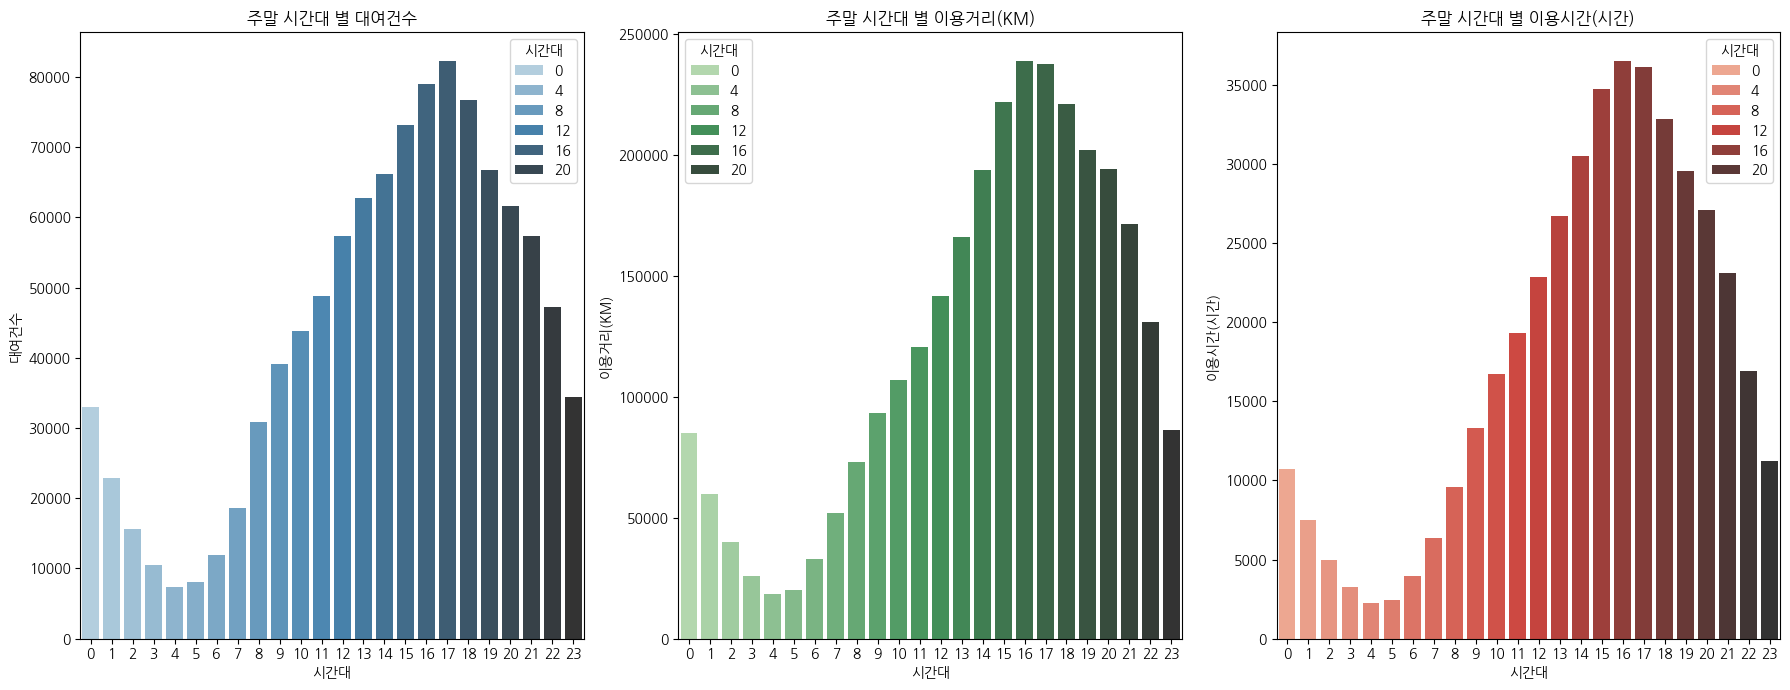

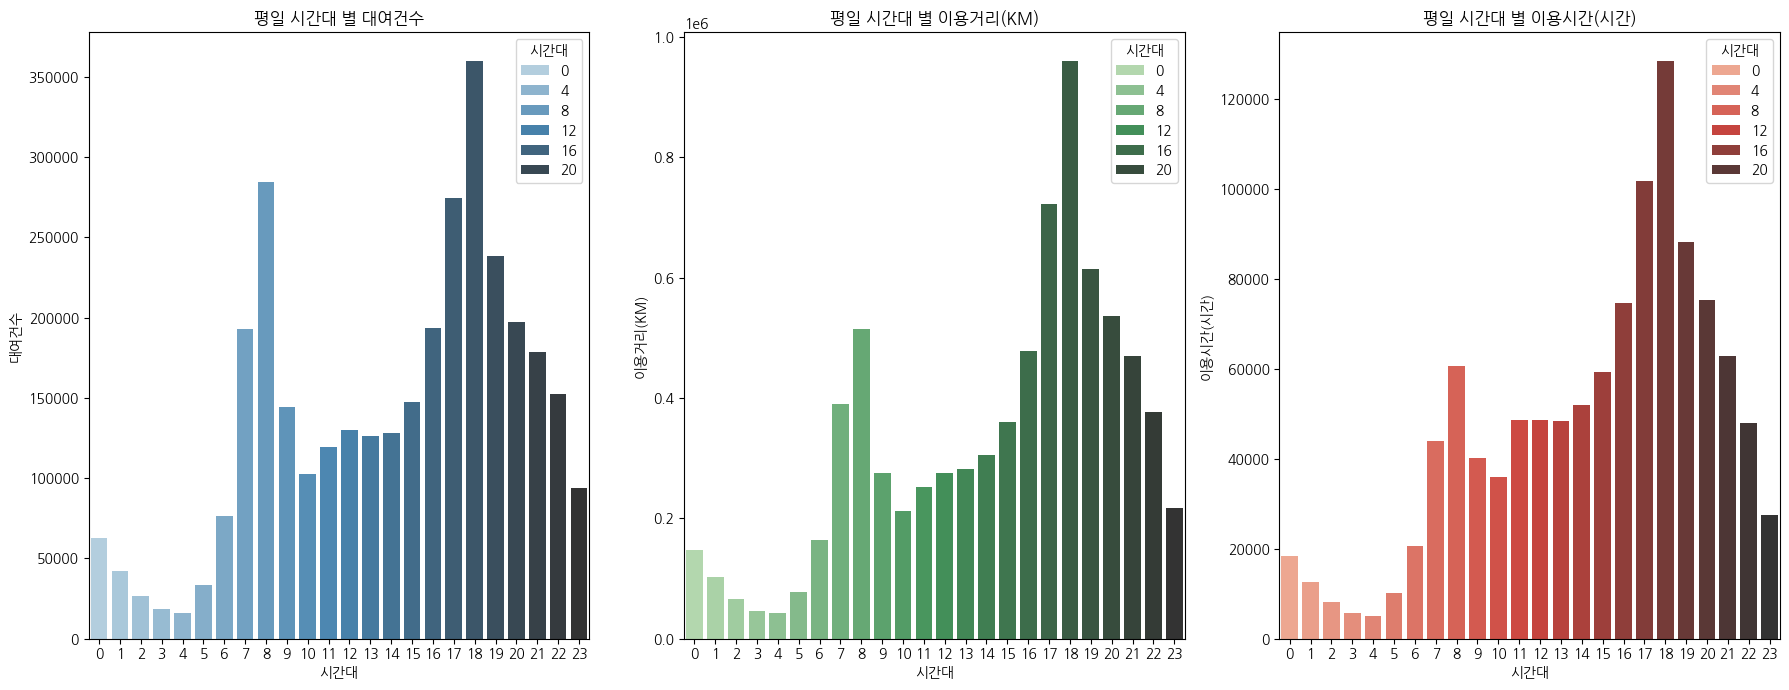

In [97]:
# 주말과 평일 데이터로 나누기
weekend_df = time_summary_df[time_summary_df['주말/평일'] == '주말']
weekday_df = time_summary_df[time_summary_df['주말/평일'] == '평일']

# 시각화
plt.figure(figsize=(18, 7))


# 주말 데이터
plt.subplot(1, 3, 1)
sns.barplot(data=weekend_df, x='시간대', y='대여건수', hue='시간대', palette='Blues_d')
plt.title('주말 시간대 별 대여건수')
plt.xlabel('시간대')
plt.ylabel('대여건수')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.barplot(data=weekend_df, x='시간대', y='이용거리(KM)', hue='시간대', palette='Greens_d')
plt.title('주말 시간대 별 이용거리(KM)')
plt.xlabel('시간대')
plt.ylabel('이용거리(KM)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.barplot(data=weekend_df, x='시간대', y='이용시간(시간)', hue='시간대', palette='Reds_d')
plt.title('주말 시간대 별 이용시간(시간)')
plt.xlabel('시간대')
plt.ylabel('이용시간(시간)')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()



plt.figure(figsize=(18, 7))

# 평일 데이터
plt.subplot(1, 3, 1)
sns.barplot(data=weekday_df, x='시간대', y='대여건수', hue='시간대', palette='Blues_d')
plt.title('평일 시간대 별 대여건수')
plt.xlabel('시간대')
plt.ylabel('대여건수')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
sns.barplot(data=weekday_df, x='시간대', y='이용거리(KM)', hue='시간대', palette='Greens_d')
plt.title('평일 시간대 별 이용거리(KM)')
plt.xlabel('시간대')
plt.ylabel('이용거리(KM)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
sns.barplot(data=weekday_df, x='시간대', y='이용시간(시간)', hue='시간대', palette='Reds_d')
plt.title('평일 시간대 별 이용시간(시간)')
plt.xlabel('시간대')
plt.ylabel('이용시간(시간)')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

**분포 확인 결과, 주말의 공공자전거 이용건수 분포는 'S'의 형태를 보이는데, 평일의 공공자전거 이용건수 분포는 'W'의 형태를 나타낸다.**

**평일 출퇴근시간에 이용률이 많다는 건 기사를 통해서 접할 수 있었다. 그렇다면 왜 평일 출퇴근시간 제외 9시 ~ 15시, 주말 오전시간대인 6시 ~ 12시까지는 공공자전거 이용건수가 상대적으로 적고 이 시간대에 이용용도는 무엇일까?**

**-> 이 시간대에 이용건수가 낮은 원인에 대해 분석하고 이에 대한 편차를 개선해보고자 함.**


# 분석 과정 (시간대별 이용용도 분석)

**먼저 시간대별로 대여를 어디서 했는지, 반납을 어디서 했는지 파악하여 이용 용도를 파악해보고자 한다.**

In [98]:
new_bike_rent_return_23_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4396229 entries, 0 to 217620
Data columns (total 12 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일시     datetime64[ns]
 1   반납일시     datetime64[ns]
 2   이용시간(분)  int64         
 3   이용거리(M)  float64       
 4   생년       object        
 5   대여대여소명   object        
 6   반납대여소명   object        
 7   월        period[M]     
 8   대여일자     object        
 9   요일       object        
 10  주말/평일    object        
 11  시간대      int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(6), period[M](1)
memory usage: 419.3+ MB


In [99]:
# '대여일시'와 '반납일시'를 datetime으로 변환
new_bike_rent_return_23_df['대여일시'] = pd.to_datetime(new_bike_rent_return_23_df['대여일시'])
new_bike_rent_return_23_df['반납일시'] = pd.to_datetime(new_bike_rent_return_23_df['반납일시'])

# 시간만 추출하여 '대여시간대'와 '반납시간대'에 추가
new_bike_rent_return_23_df['대여시간대'] = new_bike_rent_return_23_df['대여일시'].dt.hour
new_bike_rent_return_23_df['반납시간대'] = new_bike_rent_return_23_df['반납일시'].dt.hour

In [100]:
# 요일을 추출하여 '요일' 열에 저장
new_bike_rent_return_23_df['요일'] = new_bike_rent_return_23_df['대여일시'].dt.weekday

# 평일/주말 구분
new_bike_rent_return_23_df['평일/주말'] = new_bike_rent_return_23_df['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# 결과 출력
print(new_bike_rent_return_23_df[['대여일시', '평일/주말']])

                      대여일시 평일/주말
0      2023-01-26 00:08:19    평일
1      2023-01-31 00:26:23    평일
2      2023-01-27 00:39:28    평일
3      2023-01-01 00:52:11    주말
4      2023-01-23 00:21:15    평일
...                    ...   ...
217616 2023-12-04 23:10:32    평일
217617 2023-12-08 23:22:26    평일
217618 2023-12-05 23:36:20    평일
217619 2023-12-03 23:40:33    주말
217620 2023-12-04 23:21:10    평일

[4396229 rows x 2 columns]


In [101]:
new_bike_rent_return_23_df

,대여일시,반납일시,이용시간(분),이용거리(M),생년,대여대여소명,반납대여소명,월,대여일자,요일,주말/평일,시간대,대여시간대,반납시간대,평일/주말
0,2023-01-26 00:08:19,2023-01-26 00:18:22,10,1438.74,1969,센트럴 푸르지오 시티 앞,영등포구청역 1번출구,2023-01,2023-01-26,3,평일,0,0,0,평일
1,2023-01-31 00:26:23,2023-01-31 00:28:49,2,260.00,1995,보문역6번출구 앞,용문2교 옆,2023-01,2023-01-31,1,평일,0,0,0,평일
2,2023-01-27 00:39:28,2023-01-27 00:45:22,5,760.59,1994,센트럴 푸르지오 시티 앞,영등포유통상가 사거리,2023-01,2023-01-27,4,평일,0,0,0,평일
3,2023-01-01 00:52:11,2023-01-01 01:23:19,31,3900.00,2003,종로구청 옆,남영역 건너편,2023-01,2023-01-01,6,주말,0,0,1,주말
4,2023-01-23 00:21:15,2023-01-23 00:31:55,10,1925.04,1994,증산교 앞,응암오거리,2023-01,2023-01-23,0,평일,0,0,0,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217616,2023-12-04 23:10:32,2023-12-04 23:23:03,12,2300.00,2005,기쁜우리복지관,염창동 한마음아파트 앞,2023-12,2023-12-04,0,평일,23,23,23,평일
217617,2023-12-08 23:22:26,2023-12-08 23:38:11,15,2358.52,1992,마포구청역,연희IC 남측,2023-12,2023-12-08,4,평일,23,23,23,평일
217618,2023-12-05 23:36:20,2023-12-05 23:47:36,11,1753.75,1994,용두역 4번출구,안암2교 옆,2023-12,2023-12-05,1,평일,23,23,23,평일
217619,2023-12-03 23:40:33,2023-12-03 23:47:15,6,1388.01,1999,쌍문역4번출구 주변,쌍문현대1차아파트 108동 앞,2023-12,2023-12-03,6,주말,23,23,23,주말


In [102]:
# 평일 중 이용률이 낮은 대여시간대와 대여대여소명 기준으로 그룹화하여 카운트
low_rent_weekday_df = new_bike_rent_return_23_df[(new_bike_rent_return_23_df['대여시간대'] >= 9) & (new_bike_rent_return_23_df['대여시간대'] < 15) & (new_bike_rent_return_23_df['평일/주말'] == '평일')].groupby(['대여시간대', '대여대여소명']).size().reset_index(name='대여건수')
low_rent_weekday_df

,대여시간대,대여대여소명,대여건수
0,9,(시립)고덕평생학습관,17
1,9,(재)FITI시험연구원,135
2,9,3호선 매봉역 3번출구앞,91
3,9,419민주묘지 입구사거리,9
4,9,419민주묘지역,41
...,...,...,...
16591,14,희성오피앙,41
16592,14,희훈타워빌 앞,69
16593,14,힐스테이트에코,132
16594,14,힐스테이트창경궁 아파트 앞,45


In [103]:
# 주말 중 이용률이 낮은 대여시간대와 대여대여소명 기준으로 그룹화하여 카운트
low_rent_weekend_df = new_bike_rent_return_23_df[(new_bike_rent_return_23_df['대여시간대'] >= 6) & (new_bike_rent_return_23_df['대여시간대'] < 12) & (new_bike_rent_return_23_df['평일/주말'] == '주말')].groupby(['대여시간대', '대여대여소명']).size().reset_index(name='대여건수')
low_rent_weekend_df

,대여시간대,대여대여소명,대여건수
0,6,(시립)고덕평생학습관,1
1,6,(재)FITI시험연구원,1
2,6,3호선 매봉역 3번출구앞,5
3,6,419민주묘지 입구사거리,1
4,6,419민주묘지역,4
...,...,...,...
15484,11,희성오피앙,15
15485,11,희훈타워빌 앞,29
15486,11,힐스테이트에코,44
15487,11,힐스테이트창경궁 아파트 앞,17


**이용률이 낮은 시간대에 대여시간대와 대여대여소명으로 그룹화를 해보니 평일, 주말 둘다 15000건 이상이 나왔다.**

**해당 시간대에 주요 이용 용도를 분석하려는 목적이기에 대여건수 상위 대여소 3개만 추출하여 이용 용도을 파악하려 한다.**

In [104]:
# 시간대별로 그룹화하고, 각 그룹에서 상위 3개 추출하는 함수
def top_spot_per_hour(df: pd.DataFrame, n: int = 3) -> pd.DataFrame:
    top_n_df = df.groupby(df.columns[0]).apply(lambda x: x.nlargest(n, df.columns[2])).reset_index(drop=True)

    return top_n_df

In [105]:
top_rent_weekday_df = top_spot_per_hour(low_rent_weekday_df)
top_rent_weekend_df = top_spot_per_hour(low_rent_weekend_df)

In [106]:
# 특정 대여소에 대여하여 많이 반납하는 대여소 상위 3개소를 추출하는데 필요한 함수
def top_spot(df: pd.DataFrame, n: int = 3) -> pd.DataFrame:
     # '반납건수' 기준으로 내림차순 정렬
    sorted_df = df.sort_values(by='반납건수', ascending=False)

    # 상위 N개의 데이터 선택
    top_n_df = sorted_df.head(n)

    return top_n_df

In [107]:
# 필터링 조건에 맞는 데이터 추출
filtered_df = new_bike_rent_return_23_df[['대여시간대', '대여대여소명', '반납시간대', '반납대여소명', '이용시간(분)', '이용거리(M)']][(new_bike_rent_return_23_df['대여시간대'] == 0) & (new_bike_rent_return_23_df['대여대여소명'] == '한강공원 망원나들목')]

# 반납대여소명별 반납건수, 이용시간의 평균, 이용거리의 평균 계산
filtered_group_df = filtered_df.groupby('반납대여소명').agg(
    반납건수=('반납대여소명', 'size'),  # 반납건수
    평균이용시간=('이용시간(분)', 'mean'),  # 평균 이용시간
    평균이용거리=('이용거리(M)', 'mean')   # 평균 이용거리
).reset_index()

top_spot(filtered_group_df)

,반납대여소명,반납건수,평균이용시간,평균이용거리
126,한강공원 망원나들목,39,42.666667,3241.270000
1,CJ 드림시티,14,37.857143,5755.412857
107,응암역2번출구 국민은행 앞,12,43.000000,7159.198333


In [108]:
n_bike_rent_return_df = new_bike_rent_return_23_df[['대여시간대', '대여대여소명', '반납시간대', '반납대여소명', '이용시간(분)', '이용거리(M)']]

In [109]:
def top_rent_to_return(df: pd.DataFrame, n: int = 3) -> pd.DataFrame:
    for i in range(len(df)):
        filtered_df = n_bike_rent_return_df[(n_bike_rent_return_df['대여시간대'] == df.iloc[i, 0]) & (n_bike_rent_return_df['대여대여소명'] == df.iloc[i, 1])]
        # 반납대여소명별 반납건수, 이용시간의 평균, 이용거리의 평균 계산
        filtered_group_df = filtered_df.groupby('반납대여소명').agg(
            반납건수=('반납대여소명', 'size'),  # 반납건수
            평균이용시간=('이용시간(분)', 'mean'),  # 평균 이용시간
            평균이용거리=('이용거리(M)', 'mean')   # 평균 이용거리
        ).reset_index()
        top_filtered_group_df = top_spot(filtered_group_df)

        df.loc[i, '반납대여소(1순위)'] = top_filtered_group_df.iloc[0, 0]
        df.loc[i, '평균이용시간(분)(1순위)'] = round(top_filtered_group_df.iloc[0, 2], 0)
        df.loc[i, '평균이용거리(m)(1순위)'] = round(top_filtered_group_df.iloc[0, 3], 0)
        df.loc[i, '반납대여소(2순위)'] = top_filtered_group_df.iloc[1, 0]
        df.loc[i, '평균이용시간(분)(2순위)'] = round(top_filtered_group_df.iloc[1, 2], 0)
        df.loc[i, '평균이용거리(m)(2순위)'] = round(top_filtered_group_df.iloc[1, 3], 0)
        df.loc[i, '반납대여소(3순위)'] = top_filtered_group_df.iloc[2, 0]
        df.loc[i, '평균이용시간(분)(3순위)'] = round(top_filtered_group_df.iloc[2, 2], 0)
        df.loc[i, '평균이용거리(m)(3순위)'] = round(top_filtered_group_df.iloc[2, 3], 0)

    return df

In [110]:
top_time_rent_weekday_df = top_rent_to_return(top_rent_weekday_df)
top_time_rent_weekday_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위)
0,9,마곡나루역 2번 출구,838,LG유플러스 마곡사옥,7.0,994.0,LG사이언스파크 E10동,5.0,858.0,마곡역 교차로(2번출구),4.0,743.0
1,9,마곡나루역 5번출구 뒤편,602,LG유플러스 마곡사옥,5.0,875.0,LG사이언스파크 E10동,5.0,779.0,LG사이언스파크 E14동,4.0,803.0
2,9,페코텍글로벌허브빌딩 앞,499,유니베라 앞,8.0,1540.0,우영테크노센터 앞,6.0,952.0,하우스디세종타워 앞,8.0,1465.0
3,10,마곡나루역 2번 출구,280,마곡나루역 2번 출구,42.0,2353.0,LG유플러스 마곡사옥,6.0,1037.0,마곡문화공원,11.0,932.0
4,10,건국대학교 (입학정보관),257,건국대학교 학생회관,10.0,554.0,건국대학교 과학관(이과대) 앞,8.0,757.0,건국대학교 (입학정보관),40.0,1529.0
5,10,신대방역 2번 출구,220,우성아파트 앞,7.0,752.0,신대방역 2번 출구,49.0,4895.0,미성동 신림체육센터,6.0,883.0
6,11,금융감독원 앞,372,금융감독원 앞,76.0,2499.0,KT앞,70.0,3393.0,롯데캐슬엠파이어 옆,10.0,638.0
7,11,마곡나루역 2번 출구,344,마곡나루역 2번 출구,38.0,2587.0,힐스테이트에코,6.0,1080.0,LG유플러스 마곡사옥,6.0,1051.0
8,11,송파구청,335,송파구청,53.0,2470.0,롯데월드타워(잠실역2번출구 쪽),8.0,742.0,잠실 파크리오 120동 앞,10.0,797.0
9,12,마곡나루역 2번 출구,467,LG유플러스 마곡사옥,8.0,1101.0,서울식물원 잔디마당 앞,5.0,622.0,힐스테이트에코,11.0,1080.0


In [111]:
top_time_rent_weekend_df = top_rent_to_return(top_rent_weekend_df)
top_time_rent_weekend_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위)
0,6,마곡나루역 2번 출구,45,마곡 MICE 복합단지,4.0,526.0,마곡역 교차로(2번출구),4.0,710.0,LG사이언스파크 E10동,6.0,835.0
1,6,마곡나루역 3번 출구,40,서울식물원(문화센터) 건너편,6.0,840.0,이랜드글로벌R&D센터,3.0,696.0,코오롱One&Only타워,4.0,690.0
2,6,등촌1-10단지 교차로,35,마곡나루역 3번 출구,6.0,1088.0,"발산역 1번, 9번 인근 대여소",3.0,544.0,LG사이언스파크 W4동,4.0,822.0
3,7,아산병원 기숙사 부근,90,한성백제역 1번출구 뒤,11.0,1650.0,미호 플랜트 앞,9.0,1294.0,몽촌토성역 3번 출구,13.0,2183.0
4,7,청소년수련관 후문,49,하계역 6번출구,7.0,828.0,중계역 3번출구,5.0,646.0,노원경찰서교차로,7.0,1126.0
5,7,문래동롯데캐슬아파트,45,양평역 1번출구,5.0,840.0,문래동자이아파트 앞,6.0,940.0,신동아아파트,5.0,561.0
6,8,철도교통관제센터 정문 앞,137,해원리바파크 육교 밑,4.0,627.0,가산디지털단지 9번출구 인근,11.0,2055.0,삼성전자 물류센터 앞,4.0,788.0
7,8,신대방역 2번 출구,86,우성아파트 앞,7.0,748.0,구로디지털단지역 앞,10.0,1636.0,보라매병원역 1번출구,16.0,1467.0
8,8,마곡나루역 2번 출구,83,서울식물원 잔디마당 앞,4.0,555.0,LG유플러스 마곡사옥,5.0,1004.0,롯데 R&D 센터,3.0,455.0
9,9,마곡나루역 2번 출구,114,LG유플러스 마곡사옥,7.0,994.0,LG사이언스파크 E10동,5.0,858.0,마곡역 교차로(2번출구),4.0,743.0


In [112]:
# 시간대별 대여건수가 높은 상위 대여소 3개에서 반납한 대여소의 상위 3개를 추출하여 엑셀로 저장
# top_time_rent_weekday_df.to_excel('시간대별 평일 대여반납 상위장소.xlsx', index=False)
# top_time_rent_weekend_df.to_excel('시간대별 주말 대여반납 상위장소.xlsx', index=False)

**이용 용도를 구체적으로 파악하기 위해 엑셀로 저장한 파일을 기반으로 각 대여소마다 지역특성을 수기로 기입했다. (명확한 기준과 네이버 지도를 기반으로 데이터 수집)**

***이후부터는 시간대별 평일 대여반납 상위장소(지역특성), 시간대별 주말 대여반납 상위장소(지역특성)의 데이터를 사용하는데 이 데이터는 표본추출이 아닌 전체 데이터 셋을 기반으로 한다.***

In [113]:
weekday_usage_pattern_df = pd.read_excel("/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/시간대별 평일 대여반납 상위장소(지역특성).xlsx")

In [114]:
weekday_usage_pattern_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   대여시간대           18 non-null     int64 
 1   대여대여소명          18 non-null     object
 2   대여건수            18 non-null     int64 
 3   반납대여소(1순위)      18 non-null     object
 4   평균이용시간(분)(1순위)  18 non-null     int64 
 5   평균이용거리(m)(1순위)  18 non-null     int64 
 6   반납대여소(2순위)      18 non-null     object
 7   평균이용시간(분)(2순위)  18 non-null     int64 
 8   평균이용거리(m)(2순위)  18 non-null     int64 
 9   반납대여소(3순위)      18 non-null     object
 10  평균이용시간(분)(3순위)  18 non-null     int64 
 11  평균이용거리(m)(3순위)  18 non-null     int64 
 12  대여소지역특성         18 non-null     object
 13  반납소지역특성(1순위)    18 non-null     object
 14  반납소지역특성(2순위)    18 non-null     object
 15  반납소지역특성(3순위)    18 non-null     object
dtypes: int64(8), object(8)
memory usage: 2.4+ KB


In [115]:
weekday_usage_pattern_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위),대여소지역특성,반납소지역특성(1순위),반납소지역특성(2순위),반납소지역특성(3순위)
0,9,마곡나루역 2번 출구,8303,LG유플러스 마곡사옥,6,1016,LG사이언스파크 E10동,6,856,마곡역 교차로(2번출구),4,740,"상가,지하철,여가시설","근무단지,거주지,상가",근무단지,"근무단지,상가,지하철"
1,9,마곡나루역 5번출구 뒤편,6401,LG유플러스 마곡사옥,5,853,마곡센트럴타워 1차,6,1028,LG사이언스파크 E10동,5,720,"지하철,근무단지","근무단지,거주지,상가",근무단지,근무단지
2,9,페코텍글로벌허브빌딩 앞,4969,유니베라 앞,10,1519,우영테크노센터 앞,6,957,하우스디세종타워 앞,8,1449,"근무단지,거주지,상가","근무단지,공원,거주지",근무단지,"근무단지,상가,지하철"
3,10,마곡나루역 2번 출구,2545,LG유플러스 마곡사옥,6,1051,마곡문화공원,7,879,마곡나루역 2번 출구,37,2438,"상가,지하철,여가시설","근무단지,거주지,상가","근무단지,거주지,상가","상가,지하철,여가시설"
4,10,건국대학교 (입학정보관),2398,건국대학교 학생회관,9,541,건국대학교 과학관(이과대) 앞,8,751,건국대학교 (입학정보관),34,1456,"대학교,병원,상가,지하철",대학교,대학교,"대학교,병원,상가,지하철"
5,10,신대방역 2번 출구,2350,우성거주지 앞,6,742,미성동 신림체육센터,6,812,신대방역 2번 출구,51,5217,"거주지,지하철,상가","거주지,상가","거주지,상가,공원,문화시설","거주지,지하철,상가"
6,11,금융감독원 앞,3780,금융감독원 앞,73,2575,KT앞,66,3156,롯데캐슬엠파이어 옆,10,692,"근무단지,거주지,공원,문화시설","근무단지,거주지,공원,문화시설","근무단지,거주지,공원,문화시설","거주지,백화점,상가"
7,11,마곡나루역 2번 출구,3504,마곡나루역 2번 출구,37,2329,LG유플러스 마곡사옥,8,1051,힐스테이트에코,8,1016,"상가,지하철,여가시설","상가,지하철,여가시설",근무단지,"근무단지,상가"
8,11,송파구청,3323,송파구청,55,2322,롯데월드타워(잠실역2번출구 쪽),12,869,몽촌토성역 3번 출구,14,1063,"거주지,상가,근무단지, 지하철","거주지,상가,근무단지,지하철","편의시설,거주지,지하철","거주지,상가,지하철"
9,12,마곡나루역 2번 출구,5183,마곡나루역 2번 출구,34,2532,LG유플러스 마곡사옥,8,1077,마곡역 교차로(2번출구),4,744,"상가,지하철,여가시설","상가,지하철,여가시설","근무단지,거주지,상가","근무단지,상가,지하철"


In [116]:
'''
이용 용도 분석을 용이하게 하기 위한 테이블 생성

평일 이용건수가 낮은 시간대 중 대여소와 반납소가 같은 경우를 추출하여 해당 지역특성, 이용시간, 거리와 함께 분석

해당 이용 용도 분석한 내용은 보고서에 기재
'''

# 대여대여소명과 반납대여소(1순위)가 일치하는 데이터
matched_1st = weekday_usage_pattern_df[weekday_usage_pattern_df['대여대여소명'] == weekday_usage_pattern_df['반납대여소(1순위)']].copy()
matched_1st = matched_1st[['대여시간대', '대여대여소명', '반납대여소(1순위)', '평균이용시간(분)(1순위)', '평균이용거리(m)(1순위)', '반납소지역특성(1순위)']]

# 대여대여소명과 반납대여소(2순위)가 일치하는 데이터
matched_2nd = weekday_usage_pattern_df[weekday_usage_pattern_df['대여대여소명'] == weekday_usage_pattern_df['반납대여소(2순위)']].copy()
matched_2nd = matched_2nd[['대여시간대', '대여대여소명', '반납대여소(2순위)', '평균이용시간(분)(2순위)', '평균이용거리(m)(2순위)', '반납소지역특성(2순위)']]

# 대여대여소명과 반납대여소(3순위)가 일치하는 데이터
matched_3rd = weekday_usage_pattern_df[weekday_usage_pattern_df['대여대여소명'] == weekday_usage_pattern_df['반납대여소(3순위)']].copy()
matched_3rd = matched_3rd[['대여시간대', '대여대여소명', '반납대여소(3순위)', '평균이용시간(분)(3순위)', '평균이용거리(m)(3순위)', '반납소지역특성(3순위)']]

# 열 이름 통일
matched_1st.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']
matched_2nd.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']
matched_3rd.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']

# 데이터프레임을 세로로 결합
matched_rent_retuen_df = pd.concat([matched_1st, matched_2nd, matched_3rd])

# 대여시간대 순으로 정렬
matched_rent_retuen_df = matched_rent_retuen_df.sort_values(by='대여시간대').reset_index(drop=True)

matched_rent_retuen_df

,대여시간대,대여대여소명,반납대여소,평균이용시간(분),평균이용거리(m),지역특성
0,10,마곡나루역 2번 출구,마곡나루역 2번 출구,37,2438,"상가,지하철,여가시설"
1,10,건국대학교 (입학정보관),건국대학교 (입학정보관),34,1456,"대학교,병원,상가,지하철"
2,10,신대방역 2번 출구,신대방역 2번 출구,51,5217,"거주지,지하철,상가"
3,11,금융감독원 앞,금융감독원 앞,73,2575,"근무단지,거주지,공원,문화시설"
4,11,마곡나루역 2번 출구,마곡나루역 2번 출구,37,2329,"상가,지하철,여가시설"
5,11,송파구청,송파구청,55,2322,"거주지,상가,근무단지,지하철"
6,12,마곡나루역 2번 출구,마곡나루역 2번 출구,34,2532,"상가,지하철,여가시설"
7,12,송파구청,송파구청,40,2450,"거주지,상가,근무단지, 지하철"
8,13,"발산역 1번, 9번 인근 대여소","발산역 1번, 9번 인근 대여소",43,1968,"병원,거주지,상가,지하철"
9,13,마곡나루역 2번 출구,마곡나루역 2번 출구,41,2989,"상가,지하철,여가시설"


In [117]:
# 대여소와 반납소가 다른 반납소의 지역특성만 나타내기

copy_weekday_usage_pattern_df = weekday_usage_pattern_df.copy()

# 대여대여소명과 반납대여소(1순위)가 같은 경우
mask_1st = copy_weekday_usage_pattern_df['대여대여소명'] == copy_weekday_usage_pattern_df['반납대여소(1순위)']

# 대여대여소명과 반납대여소(2순위)가 같은 경우
mask_2nd = copy_weekday_usage_pattern_df['대여대여소명'] == copy_weekday_usage_pattern_df['반납대여소(2순위)']

# 대여대여소명과 반납대여소(2순위)가 같은 경우
mask_3rd = copy_weekday_usage_pattern_df['대여대여소명'] == copy_weekday_usage_pattern_df['반납대여소(3순위)']

# 해당 조건에 따라 열 값 삭제 (NaN으로 설정)
copy_weekday_usage_pattern_df.loc[mask_1st, ['반납소지역특성(1순위)']] = ''
copy_weekday_usage_pattern_df.loc[mask_2nd, ['반납소지역특성(2순위)']] = ''
copy_weekday_usage_pattern_df.loc[mask_3rd, ['반납소지역특성(3순위)']] = ''

# 결과 출력
copy_weekday_usage_pattern_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위),대여소지역특성,반납소지역특성(1순위),반납소지역특성(2순위),반납소지역특성(3순위)
0,9,마곡나루역 2번 출구,8303,LG유플러스 마곡사옥,6,1016,LG사이언스파크 E10동,6,856,마곡역 교차로(2번출구),4,740,"상가,지하철,여가시설","근무단지,거주지,상가",근무단지,"근무단지,상가,지하철"
1,9,마곡나루역 5번출구 뒤편,6401,LG유플러스 마곡사옥,5,853,마곡센트럴타워 1차,6,1028,LG사이언스파크 E10동,5,720,"지하철,근무단지","근무단지,거주지,상가",근무단지,근무단지
2,9,페코텍글로벌허브빌딩 앞,4969,유니베라 앞,10,1519,우영테크노센터 앞,6,957,하우스디세종타워 앞,8,1449,"근무단지,거주지,상가","근무단지,공원,거주지",근무단지,"근무단지,상가,지하철"
3,10,마곡나루역 2번 출구,2545,LG유플러스 마곡사옥,6,1051,마곡문화공원,7,879,마곡나루역 2번 출구,37,2438,"상가,지하철,여가시설","근무단지,거주지,상가","근무단지,거주지,상가",
4,10,건국대학교 (입학정보관),2398,건국대학교 학생회관,9,541,건국대학교 과학관(이과대) 앞,8,751,건국대학교 (입학정보관),34,1456,"대학교,병원,상가,지하철",대학교,대학교,
5,10,신대방역 2번 출구,2350,우성거주지 앞,6,742,미성동 신림체육센터,6,812,신대방역 2번 출구,51,5217,"거주지,지하철,상가","거주지,상가","거주지,상가,공원,문화시설",
6,11,금융감독원 앞,3780,금융감독원 앞,73,2575,KT앞,66,3156,롯데캐슬엠파이어 옆,10,692,"근무단지,거주지,공원,문화시설",,"근무단지,거주지,공원,문화시설","거주지,백화점,상가"
7,11,마곡나루역 2번 출구,3504,마곡나루역 2번 출구,37,2329,LG유플러스 마곡사옥,8,1051,힐스테이트에코,8,1016,"상가,지하철,여가시설",,근무단지,"근무단지,상가"
8,11,송파구청,3323,송파구청,55,2322,롯데월드타워(잠실역2번출구 쪽),12,869,몽촌토성역 3번 출구,14,1063,"거주지,상가,근무단지, 지하철",,"편의시설,거주지,지하철","거주지,상가,지하철"
9,12,마곡나루역 2번 출구,5183,마곡나루역 2번 출구,34,2532,LG유플러스 마곡사옥,8,1077,마곡역 교차로(2번출구),4,744,"상가,지하철,여가시설",,"근무단지,거주지,상가","근무단지,상가,지하철"


In [118]:
# 반납1순위, 반납2순위, 반납3순위를 합쳐서 새로운 열 생성
copy_weekday_usage_pattern_df['반납소지역특성'] = copy_weekday_usage_pattern_df['반납소지역특성(1순위)'] + ',' + copy_weekday_usage_pattern_df['반납소지역특성(2순위)'] + ',' + copy_weekday_usage_pattern_df['반납소지역특성(3순위)']
copy_weekday_usage_pattern_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위),대여소지역특성,반납소지역특성(1순위),반납소지역특성(2순위),반납소지역특성(3순위),반납소지역특성
0,9,마곡나루역 2번 출구,8303,LG유플러스 마곡사옥,6,1016,LG사이언스파크 E10동,6,856,마곡역 교차로(2번출구),4,740,"상가,지하철,여가시설","근무단지,거주지,상가",근무단지,"근무단지,상가,지하철","근무단지,거주지,상가,근무단지,근무단지,상가,지하철"
1,9,마곡나루역 5번출구 뒤편,6401,LG유플러스 마곡사옥,5,853,마곡센트럴타워 1차,6,1028,LG사이언스파크 E10동,5,720,"지하철,근무단지","근무단지,거주지,상가",근무단지,근무단지,"근무단지,거주지,상가,근무단지,근무단지"
2,9,페코텍글로벌허브빌딩 앞,4969,유니베라 앞,10,1519,우영테크노센터 앞,6,957,하우스디세종타워 앞,8,1449,"근무단지,거주지,상가","근무단지,공원,거주지",근무단지,"근무단지,상가,지하철","근무단지,공원,거주지,근무단지,근무단지,상가,지하철"
3,10,마곡나루역 2번 출구,2545,LG유플러스 마곡사옥,6,1051,마곡문화공원,7,879,마곡나루역 2번 출구,37,2438,"상가,지하철,여가시설","근무단지,거주지,상가","근무단지,거주지,상가",,"근무단지,거주지,상가,근무단지,거주지,상가,"
4,10,건국대학교 (입학정보관),2398,건국대학교 학생회관,9,541,건국대학교 과학관(이과대) 앞,8,751,건국대학교 (입학정보관),34,1456,"대학교,병원,상가,지하철",대학교,대학교,,"대학교,대학교,"
5,10,신대방역 2번 출구,2350,우성거주지 앞,6,742,미성동 신림체육센터,6,812,신대방역 2번 출구,51,5217,"거주지,지하철,상가","거주지,상가","거주지,상가,공원,문화시설",,"거주지,상가,거주지,상가,공원,문화시설,"
6,11,금융감독원 앞,3780,금융감독원 앞,73,2575,KT앞,66,3156,롯데캐슬엠파이어 옆,10,692,"근무단지,거주지,공원,문화시설",,"근무단지,거주지,공원,문화시설","거주지,백화점,상가",",근무단지,거주지,공원,문화시설,거주지,백화점,상가"
7,11,마곡나루역 2번 출구,3504,마곡나루역 2번 출구,37,2329,LG유플러스 마곡사옥,8,1051,힐스테이트에코,8,1016,"상가,지하철,여가시설",,근무단지,"근무단지,상가",",근무단지,근무단지,상가"
8,11,송파구청,3323,송파구청,55,2322,롯데월드타워(잠실역2번출구 쪽),12,869,몽촌토성역 3번 출구,14,1063,"거주지,상가,근무단지, 지하철",,"편의시설,거주지,지하철","거주지,상가,지하철",",편의시설,거주지,지하철,거주지,상가,지하철"
9,12,마곡나루역 2번 출구,5183,마곡나루역 2번 출구,34,2532,LG유플러스 마곡사옥,8,1077,마곡역 교차로(2번출구),4,744,"상가,지하철,여가시설",,"근무단지,거주지,상가","근무단지,상가,지하철",",근무단지,거주지,상가,근무단지,상가,지하철"


In [119]:
'''
이용 용도 분석을 용이하게 하기 위한 테이블 생성

평일 이용건수가 낮은 시간대 중 대여소와 반납소가 다른 경우를 추출하여 대여소의 지역특성과 반납소의 공통적인 주요 지역 특성을 통해 분석

해당 이용 용도 분석한 내용은 보고서에 기재
'''


# 가장 많이 나오는 단어들 추출 함수
def most_frequent_words(text):
    # 문자열을 쉼표로 분리하여 리스트로 변환
    words = [word.strip() for word in text.split(',')]
    # 단어 빈도수 계산
    word_counts = Counter(words)
    # 가장 빈도가 높은 단어의 빈도수 찾기
    max_frequency = max(word_counts.values())
    # 가장 빈도가 높은 단어들 찾기
    most_common_words = [word for word, count in word_counts.items() if count == max_frequency]
    # 단어들을 쉼표로 연결하여 반환
    return ', '.join(most_common_words)

# 가장 많이 나오는 단어들을 새로운 열에 저장
copy_weekday_usage_pattern_df['반납소주요지역특성'] = copy_weekday_usage_pattern_df['반납소지역특성'].apply(most_frequent_words)

# 결과 출력
copy_weekday_usage_pattern_df[['대여시간대', '대여대여소명', '대여소지역특성', '반납소주요지역특성']]

,대여시간대,대여대여소명,대여소지역특성,반납소주요지역특성
0,9,마곡나루역 2번 출구,"상가,지하철,여가시설",근무단지
1,9,마곡나루역 5번출구 뒤편,"지하철,근무단지",근무단지
2,9,페코텍글로벌허브빌딩 앞,"근무단지,거주지,상가",근무단지
3,10,마곡나루역 2번 출구,"상가,지하철,여가시설","근무단지, 거주지, 상가"
4,10,건국대학교 (입학정보관),"대학교,병원,상가,지하철",대학교
5,10,신대방역 2번 출구,"거주지,지하철,상가","거주지, 상가"
6,11,금융감독원 앞,"근무단지,거주지,공원,문화시설",거주지
7,11,마곡나루역 2번 출구,"상가,지하철,여가시설",근무단지
8,11,송파구청,"거주지,상가,근무단지, 지하철","거주지, 지하철"
9,12,마곡나루역 2번 출구,"상가,지하철,여가시설","근무단지, 상가"


In [120]:
weekend_usage_pattern_df = pd.read_excel('/content/drive/MyDrive/공공자전거_프로젝트(코드잇)/가공데이터/시간대별 주말 대여반납 상위장소(지역특성).xlsx')

In [121]:
'''
이용 용도 분석을 용이하게 하기 위한 테이블 생성

주말 이용건수가 낮은 시간대 중 대여소와 반납소가 같은 경우를 추출하여 해당 지역특성, 이용시간, 거리와 함께 분석

해당 이용 용도 분석한 내용은 보고서에 기재
'''


# 대여대여소명과 반납대여소(1순위)가 일치하는 데이터
matched_1st = weekend_usage_pattern_df[weekend_usage_pattern_df['대여대여소명'] == weekend_usage_pattern_df['반납대여소(1순위)']].copy()
matched_1st = matched_1st[['대여시간대', '대여대여소명', '반납대여소(1순위)', '평균이용시간(분)(1순위)', '평균이용거리(m)(1순위)', '반납소지역특성(1순위)']]

# 대여대여소명과 반납대여소(2순위)가 일치하는 데이터
matched_2nd = weekend_usage_pattern_df[weekend_usage_pattern_df['대여대여소명'] == weekend_usage_pattern_df['반납대여소(2순위)']].copy()
matched_2nd = matched_2nd[['대여시간대', '대여대여소명', '반납대여소(2순위)', '평균이용시간(분)(2순위)', '평균이용거리(m)(2순위)', '반납소지역특성(2순위)']]

# 대여대여소명과 반납대여소(3순위)가 일치하는 데이터
matched_3rd = weekend_usage_pattern_df[weekend_usage_pattern_df['대여대여소명'] == weekend_usage_pattern_df['반납대여소(3순위)']].copy()
matched_3rd = matched_3rd[['대여시간대', '대여대여소명', '반납대여소(3순위)', '평균이용시간(분)(3순위)', '평균이용거리(m)(3순위)', '반납소지역특성(3순위)']]

# 열 이름 통일
matched_1st.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']
matched_2nd.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']
matched_3rd.columns = ['대여시간대', '대여대여소명', '반납대여소', '평균이용시간(분)', '평균이용거리(m)', '지역특성']

# 데이터프레임을 세로로 결합
matched_rent_retuen_df = pd.concat([matched_1st, matched_2nd, matched_3rd])

# 대여시간대 순으로 정렬
matched_rent_retuen_df = matched_rent_retuen_df.sort_values(by='대여시간대').reset_index(drop=True)

matched_rent_retuen_df

,대여시간대,대여대여소명,반납대여소,평균이용시간(분),평균이용거리(m),지역특성
0,7,한강공원 망원나들목,한강공원 망원나들목,63,8838,"거주지,여가시설"
1,9,한강공원 망원나들목,한강공원 망원나들목,61,6802,"거주지,여가시설"
2,9,신대방역 2번 출구,신대방역 2번 출구,52,4872,"거주지,상가,지하철"
3,10,한강공원 망원나들목,한강공원 망원나들목,65,6810,"거주지,여가시설"
4,10,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,61,5793,"거주지,여가시설,지하철"
5,10,신대방역 2번 출구,신대방역 2번 출구,51,5217,"거주지,상가,지하철"
6,11,한강공원 망원나들목,한강공원 망원나들목,61,5808,"거주지,여가시설"
7,11,마곡나루역 2번 출구,마곡나루역 2번 출구,37,2329,"상가,지하철,여가시설"
8,11,올림픽공원역 3번출구,올림픽공원역 3번출구,58,3266,"거주지,여가시설,문화시설,지하철"


In [122]:
# 대여소와 반납소가 다른 반납소의 지역특성만 나타내기

copy_weekend_usage_pattern_df = weekend_usage_pattern_df.copy()

# 대여대여소명과 반납대여소(1순위)가 같은 경우
mask_1st = copy_weekend_usage_pattern_df['대여대여소명'] == copy_weekend_usage_pattern_df['반납대여소(1순위)']

# 대여대여소명과 반납대여소(2순위)가 같은 경우
mask_2nd = copy_weekend_usage_pattern_df['대여대여소명'] == copy_weekend_usage_pattern_df['반납대여소(2순위)']

# 대여대여소명과 반납대여소(2순위)가 같은 경우
mask_3rd = copy_weekend_usage_pattern_df['대여대여소명'] == copy_weekend_usage_pattern_df['반납대여소(3순위)']

# 해당 조건에 따라 열 값 삭제 (NaN으로 설정)
copy_weekend_usage_pattern_df.loc[mask_1st, ['반납소지역특성(1순위)']] = ''
copy_weekend_usage_pattern_df.loc[mask_2nd, ['반납소지역특성(2순위)']] = ''
copy_weekend_usage_pattern_df.loc[mask_3rd, ['반납소지역특성(3순위)']] = ''

# 결과 출력
copy_weekend_usage_pattern_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위),대여소지역특성,반납소지역특성(1순위),반납소지역특성(2순위),반납소지역특성(3순위)
0,6,마곡나루역 2번 출구,414,마곡역 교차로(2번출구),4,730,마곡 MICE 복합단지,4,533,LG 사이언스파크,3,523,"상가,지하철,여가시설","근무단지,상가,지하철","근무단지,여가시설",근무단지
1,6,마곡나루역 3번 출구,410,서울식물원(문화센터) 건너편,5,818,이랜드글로벌R&D센터,4,688,코오롱One&Only타워,6,688,"지하철,근무단지",여가시설,"근무단지,여가시설",근무단지
2,6,강서구립등빛도서관,382,강서구민올림픽체육센터,7,810,이랜드글로벌R&D센터,6,1015,발산역 6번 출구 뒤,5,682,거주지,"거주지,문화시설","근무단지,여가시설","거주지,병원,상가,지하철"
3,7,아산병원 기숙사 부근,1058,미호 플랜트 앞,9,1320,한성백제역 1번출구 뒤,11,1813,강동구청 앞,11,1561,"병원,기숙사,여가시설","여가시설,거주지,지하철","여가시설,거주지,지하철","상가,거주지"
4,7,청소년수련관 후문,517,하계역 6번출구,6,767,중계역 3번출구,6,662,노원경찰서교차로,8,1093,"거주지,지하철,여가시설","지하철,여가시설,문화시설,거주지","여가시설,거주지","거주지,여가시설"
5,7,한강공원 망원나들목,433,한강공원 망원나들목,63,8838,초원거주지 앞,27,5184,이대목동병원보도육교,16,3229,"거주지,여가시설",,"거주지,상가,문화시설,여가시설","병원,거주지,여가시설"
6,8,철도교통관제센터 정문 앞,1344,해원리바파크 육교 밑,4,644,가산디지털단지 9번출구 인근,11,2111,구로역 광장,10,1728,"거주지,지하철,거주지","지하철,거주지,여가시설","지하철,근무단지,상가","지하철,거주지,상가"
7,8,신대방역 2번 출구,920,우성거주지 앞,8,751,구로디지털단지역 앞,8,1288,보라매병원역 1번출구,14,1413,"거주지,상가,지하철","거주지,상가","지하철,상가,근무단지","지하철,거주지,여가시설"
8,8,마곡나루역 2번 출구,811,서울식물원 잔디마당 앞,4,543,LG유플러스 마곡사옥,6,1022,LG사이언스파크 E10동,6,860,"상가,지하철,여가시설","근무단지,여가시설,문화시설",근무단지,근무단지
9,9,마곡나루역 2번 출구,1086,LG유플러스 마곡사옥,6,1016,LG사이언스파크 E10동,6,856,마곡역 교차로(2번출구),4,740,"상가,지하철,여가시설","근무단지,문화시설",근무단지,"근무단지,거주지"


In [123]:
# 반납1순위, 반납2순위, 반납3순위를 합쳐서 새로운 열 생성
copy_weekend_usage_pattern_df['반납소지역특성'] = copy_weekend_usage_pattern_df['반납소지역특성(1순위)'] + ',' + copy_weekend_usage_pattern_df['반납소지역특성(2순위)'] + ',' + copy_weekend_usage_pattern_df['반납소지역특성(3순위)']
copy_weekend_usage_pattern_df

,대여시간대,대여대여소명,대여건수,반납대여소(1순위),평균이용시간(분)(1순위),평균이용거리(m)(1순위),반납대여소(2순위),평균이용시간(분)(2순위),평균이용거리(m)(2순위),반납대여소(3순위),평균이용시간(분)(3순위),평균이용거리(m)(3순위),대여소지역특성,반납소지역특성(1순위),반납소지역특성(2순위),반납소지역특성(3순위),반납소지역특성
0,6,마곡나루역 2번 출구,414,마곡역 교차로(2번출구),4,730,마곡 MICE 복합단지,4,533,LG 사이언스파크,3,523,"상가,지하철,여가시설","근무단지,상가,지하철","근무단지,여가시설",근무단지,"근무단지,상가,지하철,근무단지,여가시설,근무단지"
1,6,마곡나루역 3번 출구,410,서울식물원(문화센터) 건너편,5,818,이랜드글로벌R&D센터,4,688,코오롱One&Only타워,6,688,"지하철,근무단지",여가시설,"근무단지,여가시설",근무단지,"여가시설,근무단지,여가시설,근무단지"
2,6,강서구립등빛도서관,382,강서구민올림픽체육센터,7,810,이랜드글로벌R&D센터,6,1015,발산역 6번 출구 뒤,5,682,거주지,"거주지,문화시설","근무단지,여가시설","거주지,병원,상가,지하철","거주지,문화시설,근무단지,여가시설,거주지,병원,상가,지하철"
3,7,아산병원 기숙사 부근,1058,미호 플랜트 앞,9,1320,한성백제역 1번출구 뒤,11,1813,강동구청 앞,11,1561,"병원,기숙사,여가시설","여가시설,거주지,지하철","여가시설,거주지,지하철","상가,거주지","여가시설,거주지,지하철,여가시설,거주지,지하철,상가,거주지"
4,7,청소년수련관 후문,517,하계역 6번출구,6,767,중계역 3번출구,6,662,노원경찰서교차로,8,1093,"거주지,지하철,여가시설","지하철,여가시설,문화시설,거주지","여가시설,거주지","거주지,여가시설","지하철,여가시설,문화시설,거주지,여가시설,거주지,거주지,여가시설"
5,7,한강공원 망원나들목,433,한강공원 망원나들목,63,8838,초원거주지 앞,27,5184,이대목동병원보도육교,16,3229,"거주지,여가시설",,"거주지,상가,문화시설,여가시설","병원,거주지,여가시설",",거주지,상가,문화시설,여가시설,병원,거주지,여가시설"
6,8,철도교통관제센터 정문 앞,1344,해원리바파크 육교 밑,4,644,가산디지털단지 9번출구 인근,11,2111,구로역 광장,10,1728,"거주지,지하철,거주지","지하철,거주지,여가시설","지하철,근무단지,상가","지하철,거주지,상가","지하철,거주지,여가시설,지하철,근무단지,상가,지하철,거주지,상가"
7,8,신대방역 2번 출구,920,우성거주지 앞,8,751,구로디지털단지역 앞,8,1288,보라매병원역 1번출구,14,1413,"거주지,상가,지하철","거주지,상가","지하철,상가,근무단지","지하철,거주지,여가시설","거주지,상가,지하철,상가,근무단지,지하철,거주지,여가시설"
8,8,마곡나루역 2번 출구,811,서울식물원 잔디마당 앞,4,543,LG유플러스 마곡사옥,6,1022,LG사이언스파크 E10동,6,860,"상가,지하철,여가시설","근무단지,여가시설,문화시설",근무단지,근무단지,"근무단지,여가시설,문화시설,근무단지,근무단지"
9,9,마곡나루역 2번 출구,1086,LG유플러스 마곡사옥,6,1016,LG사이언스파크 E10동,6,856,마곡역 교차로(2번출구),4,740,"상가,지하철,여가시설","근무단지,문화시설",근무단지,"근무단지,거주지","근무단지,문화시설,근무단지,근무단지,거주지"


In [124]:
'''
이용 용도 분석을 용이하게 하기 위한 테이블 생성

주말 이용건수가 낮은 시간대 중 대여소와 반납소가 다른 경우를 추출하여 대여소의 지역 특성과 반납소의 공통적인 주요 지역 특성을 통해 분석

해당 이용 용도 분석한 내용은 보고서에 기재
'''


# 가장 많이 나오는 단어들 추출 함수
def most_frequent_words(text):
    # 문자열을 쉼표로 분리하여 리스트로 변환
    words = [word.strip() for word in text.split(',')]
    # 단어 빈도수 계산
    word_counts = Counter(words)
    # 가장 빈도가 높은 단어의 빈도수 찾기
    max_frequency = max(word_counts.values())
    # 가장 빈도가 높은 단어들 찾기
    most_common_words = [word for word, count in word_counts.items() if count == max_frequency]
    # 단어들을 쉼표로 연결하여 반환
    return ', '.join(most_common_words)

# 가장 많이 나오는 단어들을 새로운 열에 저장
copy_weekend_usage_pattern_df['반납소주요지역특성'] = copy_weekend_usage_pattern_df['반납소지역특성'].apply(most_frequent_words)

# 결과 출력
copy_weekend_usage_pattern_df[['대여시간대', '대여대여소명', '대여소지역특성', '반납소주요지역특성']]

,대여시간대,대여대여소명,대여소지역특성,반납소주요지역특성
0,6,마곡나루역 2번 출구,"상가,지하철,여가시설",근무단지
1,6,마곡나루역 3번 출구,"지하철,근무단지","여가시설, 근무단지"
2,6,강서구립등빛도서관,거주지,거주지
3,7,아산병원 기숙사 부근,"병원,기숙사,여가시설",거주지
4,7,청소년수련관 후문,"거주지,지하철,여가시설","여가시설, 거주지"
5,7,한강공원 망원나들목,"거주지,여가시설","거주지, 여가시설"
6,8,철도교통관제센터 정문 앞,"거주지,지하철,거주지",지하철
7,8,신대방역 2번 출구,"거주지,상가,지하철","거주지, 상가, 지하철"
8,8,마곡나루역 2번 출구,"상가,지하철,여가시설",근무단지
9,9,마곡나루역 2번 출구,"상가,지하철,여가시설",근무단지
